In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs, make_circles, load_breast_cancer, load_boston, load_iris, load_wine

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


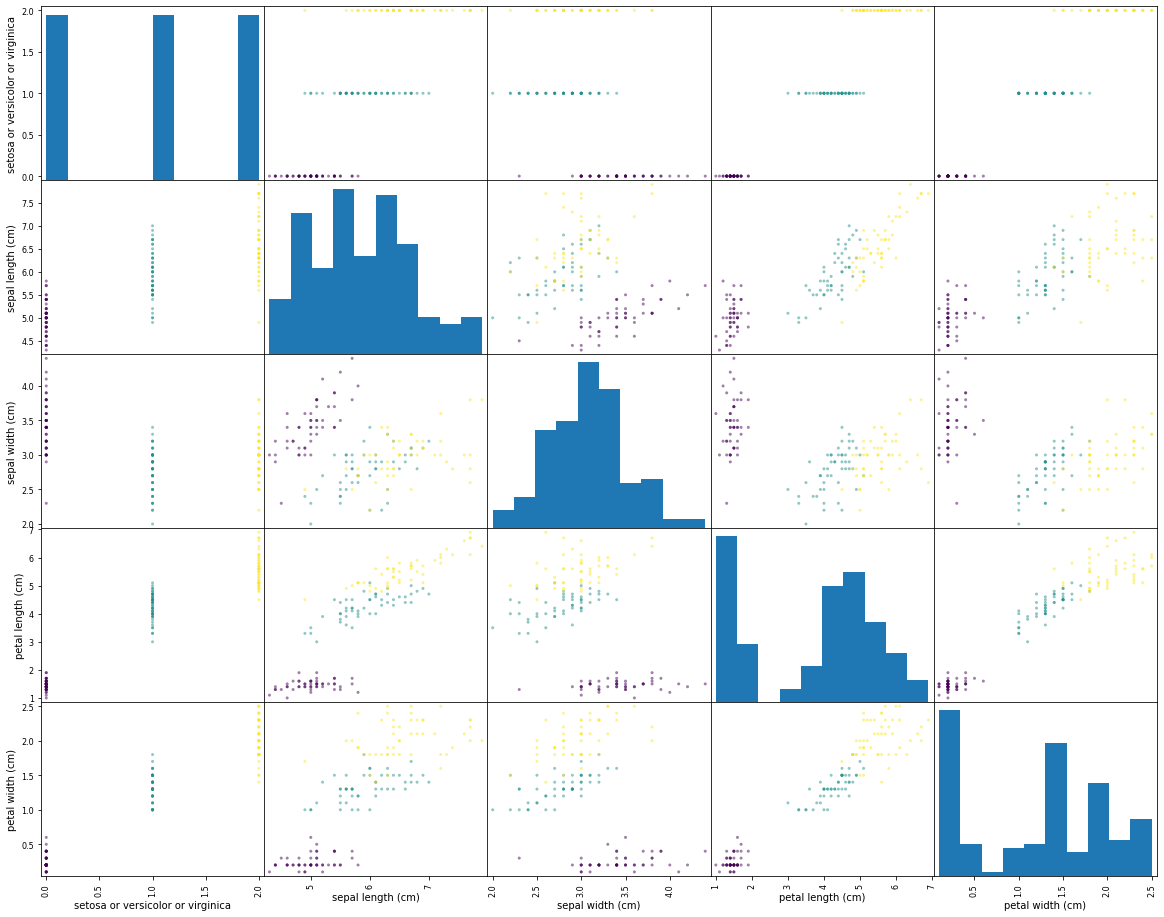

In [5]:
iris = load_iris()
iris_table = pd.DataFrame(data = np.hstack((np.transpose([iris.target]), iris.data)), columns = [' or '.join(iris.target_names)] + list(iris.feature_names))
# display(iris_table)
fig, ax = plt.subplots(1,1,figsize=(20,16))
pd.plotting.scatter_matrix(iris_table, ax = ax, c = iris.target)
plt.show()
# print(iris.DESCR)

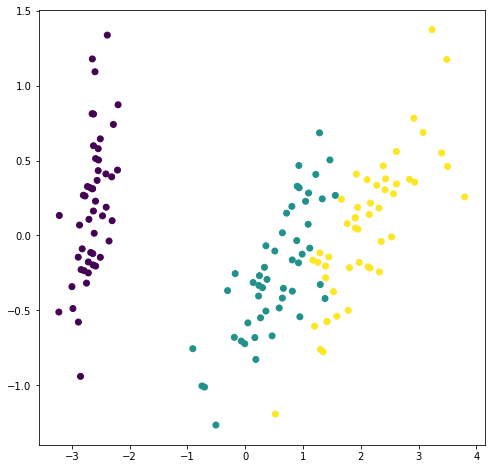

In [6]:
from sklearn.decomposition import PCA

X, y = (iris.data, iris.target)

PCA2 = PCA(n_components = 2).fit(X)
X_reduced2 = PCA2.transform(X)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_reduced2[:,0], X_reduced2[:,1], c = y)
plt.show()

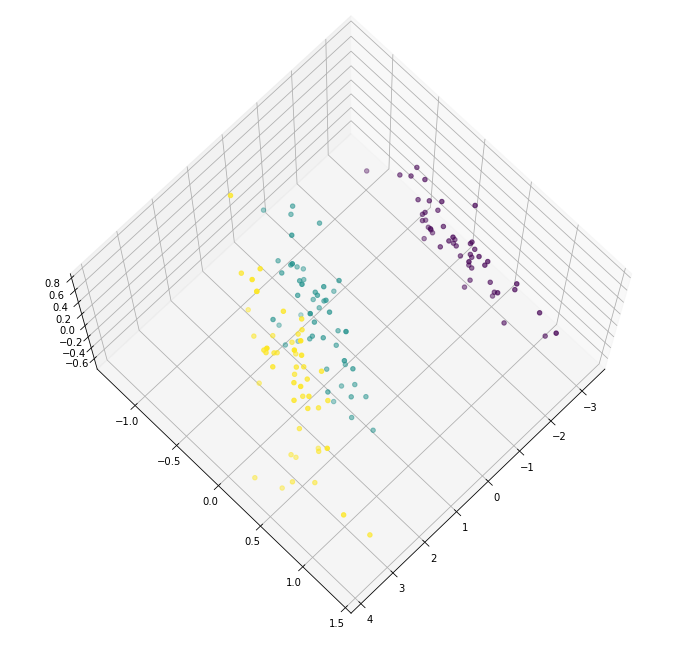

In [7]:
PCA3 = PCA(n_components = 3).fit(X)
X_reduced3 = PCA3.transform(X)

fig = plt.figure(figsize = (12,12))

ax2 = fig.add_subplot(111,projection = '3d')
ax2.scatter(X_reduced3[:,0], X_reduced3[:,1], X_reduced3[:,2], c = y)
ax2.view_init(75, 45)
plt.show()

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


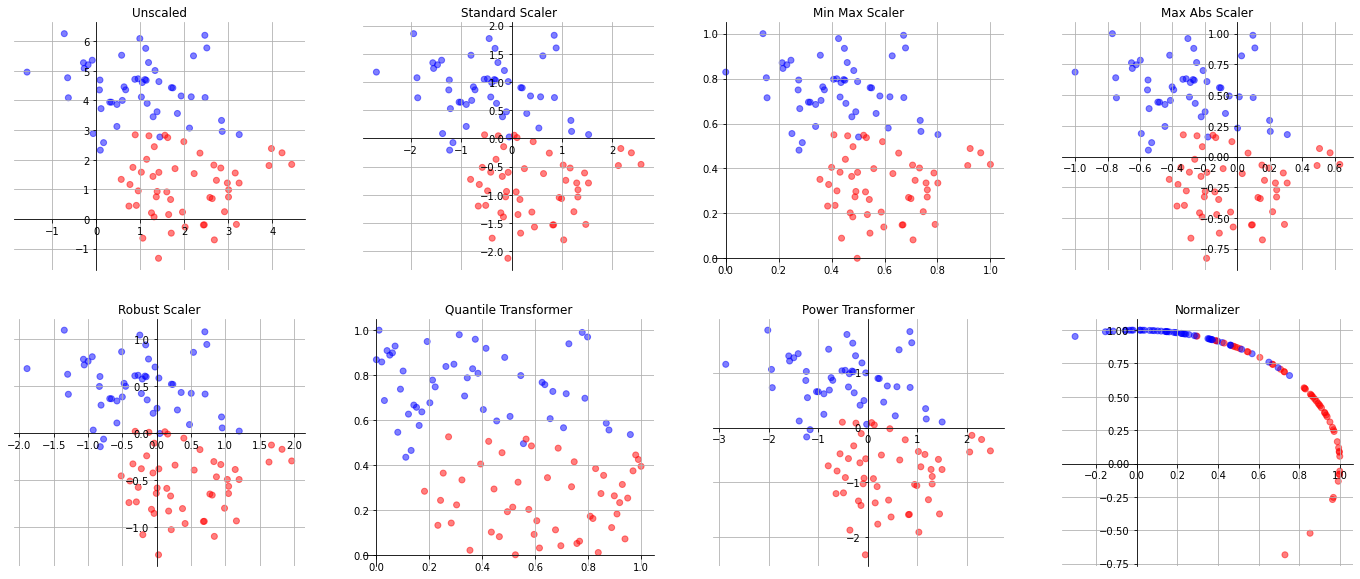

In [8]:
from sklearn import preprocessing

X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0)

fig, ax = plt.subplots(2, 4, figsize=(24,10), sharey = False, sharex = False)
alpha = 0.5
c = np.array(['blue','red'])[y]

ax[0,0].scatter(X[:,0], X[:,1], c = c, alpha = 0.5)
ax[0,0].grid()
ax[0,0].set_title('Unscaled')
ax[0,0].spines['left'].set_position('zero')
ax[0,0].spines['bottom'].set_position('zero')
ax[0,0].spines['right'].set_color('none')
ax[0,0].spines['top'].set_color('none')

X_scaled1 = preprocessing.StandardScaler().fit(X).transform(X)
Xc = X_scaled1; ind = (0,1); title = 'Standard Scaler'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled2 = preprocessing.MinMaxScaler().fit(X).transform(X)
Xc = X_scaled2; ind = (0,2); title = 'Min Max Scaler'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled3 = preprocessing.MaxAbsScaler().fit(X - np.mean(X)).transform(X- np.mean(X))
Xc = X_scaled3; ind = (0,3); title = 'Max Abs Scaler'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled4 = preprocessing.RobustScaler().fit(X).transform(X)
Xc = X_scaled4; ind = (1,0); title = 'Robust Scaler'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled5 = preprocessing.QuantileTransformer().fit(X).transform(X)
Xc = X_scaled5; ind = (1,1); title = 'Quantile Transformer'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled6 = preprocessing.PowerTransformer().fit(X).transform(X)
Xc = X_scaled6; ind = (1,2); title = 'Power Transformer'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

X_scaled7 = preprocessing.Normalizer().fit(X).transform(X)
Xc = X_scaled7; ind = (1,3); title = 'Normalizer'

ax[ind].scatter(Xc[:,0], Xc[:,1], c = c, alpha = alpha)
ax[ind].grid()
ax[ind].set_title(title)
ax[ind].spines['left'].set_position('zero')
ax[ind].spines['bottom'].set_position('zero')
ax[ind].spines['right'].set_color('none')
ax[ind].spines['top'].set_color('none')

plt.show()

In [9]:
cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nUnscaled Train:\t\t', svc.score(X_train, y_train))
print('Unscaled Test:\t\t', svc.score(X_test, y_test))

X_scaled = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nStandardScaler Train:\t', svc.score(X_train, y_train))
print('StandardScaler Test:\t', svc.score(X_test, y_test))

X_scaled = MinMaxScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nMinMaxScaler Train:\t', svc.score(X_train, y_train))
print('MinMaxScaler Test:\t', svc.score(X_test, y_test))

X_scaled = QuantileTransformer().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nQuantileTransformer Train:\t', svc.score(X_train, y_train))
print('QuantileTransformer Test:\t', svc.score(X_test, y_test))


Unscaled Train:		 0.9032258064516129
Unscaled Test:		 0.9517543859649122

StandardScaler Train:	 0.9853372434017595
StandardScaler Test:	 0.9780701754385965

MinMaxScaler Train:	 0.9824046920821115
MinMaxScaler Test:	 0.9824561403508771

QuantileTransformer Train:	 0.9970674486803519
QuantileTransformer Test:	 0.9736842105263158


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (569). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [10]:
iris = load_iris()
X, y = (iris.data, iris.target)

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nUnscaled Train:\t\t', svc.score(X_train, y_train))
print('Unscaled Test:\t\t', svc.score(X_test, y_test))

X_scaled = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 10).fit(X_train, y_train)

print('\nStandardScaler Train:\t', svc.score(X_train, y_train))
print('StandardScaler Test:\t', svc.score(X_test, y_test))

X_scaled = MinMaxScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train)

print('\nMinMaxScaler Train:\t', svc.score(X_train, y_train))
print('MinMaxScaler Test:\t', svc.score(X_test, y_test))

X_scaled = QuantileTransformer().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)

print('\nQuantileTransformer Train:\t', svc.score(X_train, y_train))
print('QuantileTransformer Test:\t', svc.score(X_test, y_test))


Unscaled Train:		 0.9888888888888889
Unscaled Test:		 0.9666666666666667

StandardScaler Train:	 0.9888888888888889
StandardScaler Test:	 0.9333333333333333

MinMaxScaler Train:	 0.9888888888888889
MinMaxScaler Test:	 0.95

QuantileTransformer Train:	 0.9888888888888889
QuantileTransformer Test:	 0.95


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [11]:
wine = load_wine()
X, y = (wine.data, wine.target)

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 100000).fit(X_train, y_train)

print('\nUnscaled Train:\t\t', svc.score(X_train, y_train))
print('Unscaled Test:\t\t', svc.score(X_test, y_test))

X_scaled = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)

print('\nStandardScaler Train:\t', svc.score(X_train, y_train))
print('StandardScaler Test:\t', svc.score(X_test, y_test))

X_scaled = MinMaxScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 0.1).fit(X_train, y_train)

print('\nMinMaxScaler Train:\t', svc.score(X_train, y_train))
print('MinMaxScaler Test:\t', svc.score(X_test, y_test))

X_scaled = QuantileTransformer().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state = 0)

svc = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)

print('\nQuantileTransformer Train:\t', svc.score(X_train, y_train))
print('QuantileTransformer Test:\t', svc.score(X_test, y_test))


Unscaled Train:		 1.0
Unscaled Test:		 0.9166666666666666

StandardScaler Train:	 1.0
StandardScaler Test:	 0.9861111111111112

MinMaxScaler Train:	 0.9905660377358491
MinMaxScaler Test:	 0.9861111111111112

QuantileTransformer Train:	 1.0
QuantileTransformer Test:	 0.9861111111111112


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (178). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


30


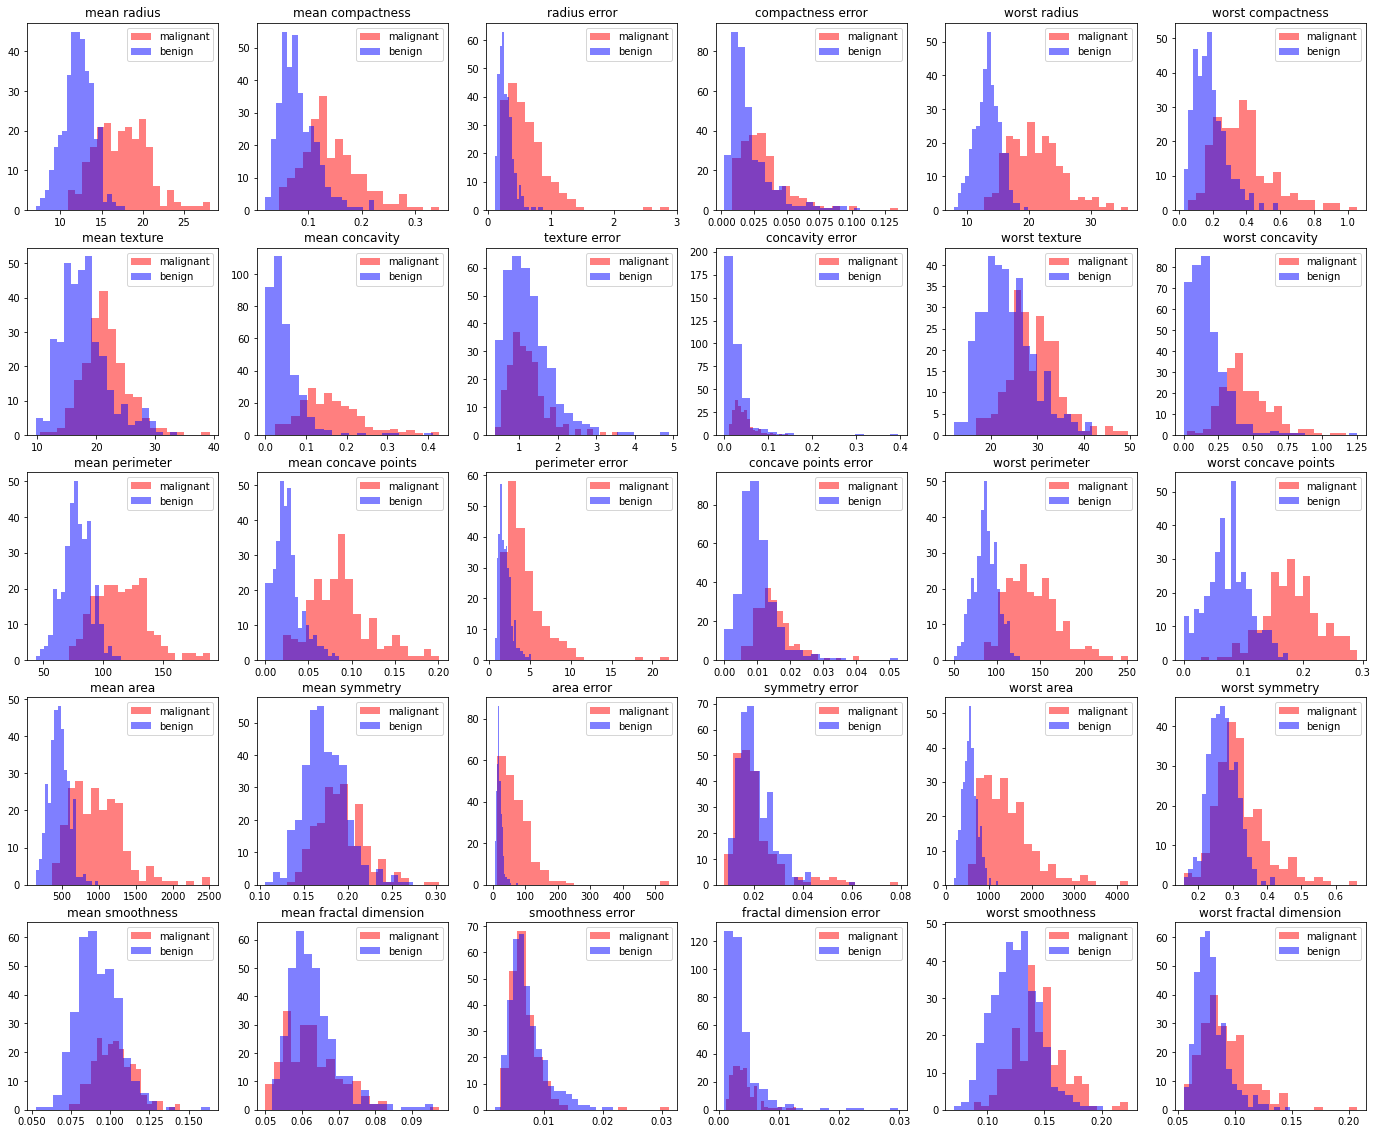

In [12]:
from numpy import ma

cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)
N = len(cancer.feature_names)
print(N) # 30

fig, ax = plt.subplots(N // 6, 6, figsize=(24,20))

for i in range(N):
    ind = (i % (N//6), i // (N//6))
#     ax[ind].hist(X[:,i])
    ax[ind].hist(ma.array(X[:,i], mask = y).compressed(), color = 'red', alpha = 0.5, bins = 20, label = 'malignant')
    ax[ind].hist(ma.array(X[:,i], mask = (1 - y)).compressed(), color = 'blue', alpha = 0.5, bins = 20, label = 'benign')
#     ax[ind].hist(X[:,i], color = np.array(['red', 'blue'])[y], alpha = 0.5, bins = 20)
    ax[ind].set_title(cancer.feature_names[i])
    ax[ind].legend()
    
plt.show()

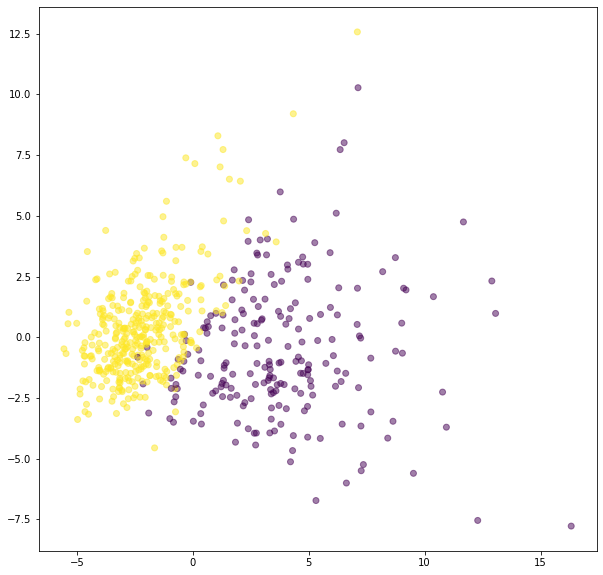

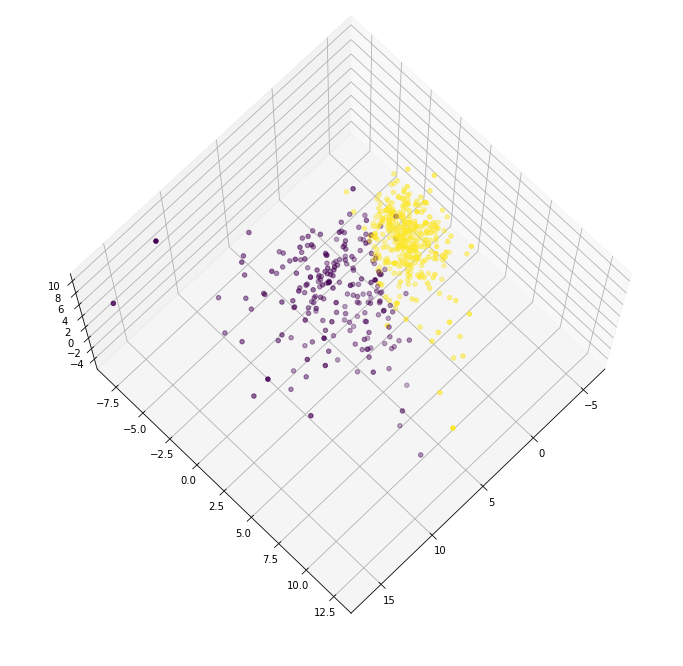

In [13]:
cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)
X_scaled = StandardScaler().fit(X).transform(X)

PCA2 = PCA(n_components = 2).fit(X_scaled)
PCA3 = PCA(n_components = 3).fit(X_scaled)
X2 = PCA2.transform(X_scaled)
X3 = PCA3.transform(X_scaled)

fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(X2[:,0], X2[:,1], c = y, alpha = 0.5)

fig = plt.figure(figsize = (12,12))

ax2 = fig.add_subplot(111,projection = '3d')
ax2.scatter(X3[:,0], X3[:,1], X3[:,2], c = y)
ax2.view_init(75, 45)

plt.show()

In [98]:
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)
X_scaled = StandardScaler().fit(X).transform(X)

PCA2 = PCA(n_components = 2).fit(X_scaled)
PCA3 = PCA(n_components = 3).fit(X_scaled)
X2 = PCA2.transform(X_scaled)
X3 = PCA3.transform(X_scaled)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 0)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3, random_state = 0)

sgd2 = SGDClassifier().fit(X2_train, y_train)
sgd3 = SGDClassifier().fit(X3_train, y_train)

print('SGD2 Train:\t', sgd2.score(X2_train, y_train))
print('SGD2 Test:\t', sgd2.score(X2_test, y_test))
print('SGD3 Train:\t', sgd3.score(X3_train, y_train))
print('SGD3 Test:\t', sgd3.score(X3_test, y_test))

print(sgd2.coef_)

print(sgd3.coef_)

SGD2 Train:	 0.9597989949748744
SGD2 Test:	 0.9122807017543859
SGD3 Train:	 0.964824120603015
SGD3 Test:	 0.935672514619883
[[-15.64107834   5.79111656]]
[[-12.57487392   6.83341594   1.98671232]]


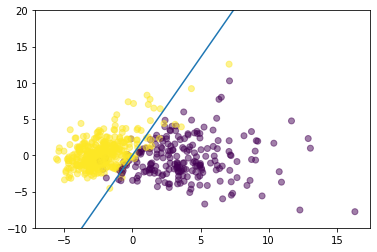

In [99]:
x2 = np.linspace(-6, 16, 100)
y2 = np.linspace(-8, 14, 100)
plt.plot(x2, - 1 / sgd2.coef_[0,1] * sgd2.coef_[0,0] * x2)
plt.scatter(X2[:,0], X2[:,1], c = y, alpha = 0.5)
plt.ylim([-10,20])

plt.show()

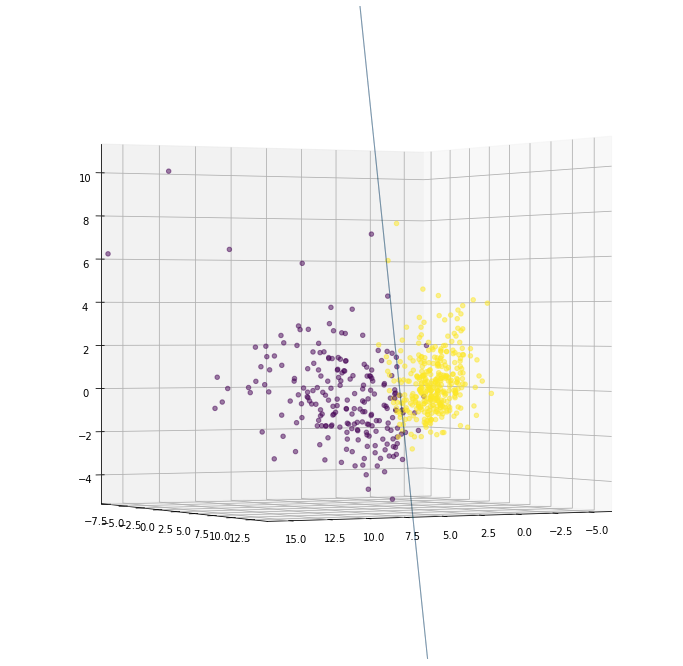

In [109]:
x3 = np.linspace(-6, 16, 100)
y3 = np.linspace(-8, 14, 100)
z3 = np.linspace(-5, 11, 100)

# xx, yy = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
xx, yy = np.meshgrid(x3, y3)
zz = - 1 / sgd3.coef_[0,2] * sgd3.coef_[0,0] * xx - 1 / sgd3.coef_[0,2] * sgd3.coef_[0,1] * yy

fig = plt.figure(figsize = (12,12))

ax2 = fig.add_subplot(111,projection = '3d')

ax2.plot_surface(xx, yy, zz, alpha = 0.5)
ax2.scatter(X3[:,0], X3[:,1], X3[:,2], c = y, alpha = 0.5)
ax2.set_xlim([-6, 16])
ax2.set_ylim([-8, 14])
ax2.set_zlim([-5, 11])
ax2.view_init(0, 62)

plt.show()

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


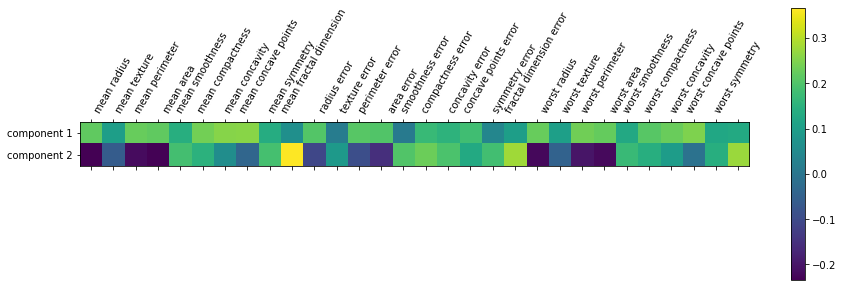

In [17]:
print(PCA2.components_)
fig, ax = plt.subplots(1,1,figsize=(15,5))
fig.colorbar(ax.matshow(PCA2.components_))
ax.set_xticks(list(np.arange(30)))
ax.set_xticklabels(['']+list(cancer.feature_names), rotation = 60)
ax.set_yticklabels(['','component 1','component 2'])
plt.show()

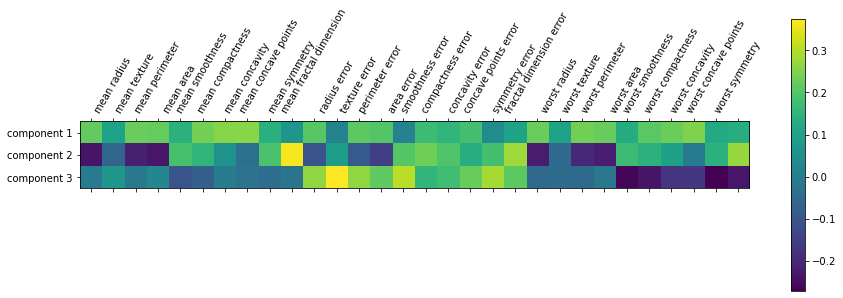

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
fig.colorbar(ax.matshow(PCA3.components_))
ax.set_xticks(list(np.arange(30)))
ax.set_xticklabels(['']+list(cancer.feature_names), rotation = 60)
ax.set_yticklabels(['','component 1','component 2', 'component 3'])
plt.show()

In [19]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people()
print(people.keys())
print(people.DESCR)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Fac

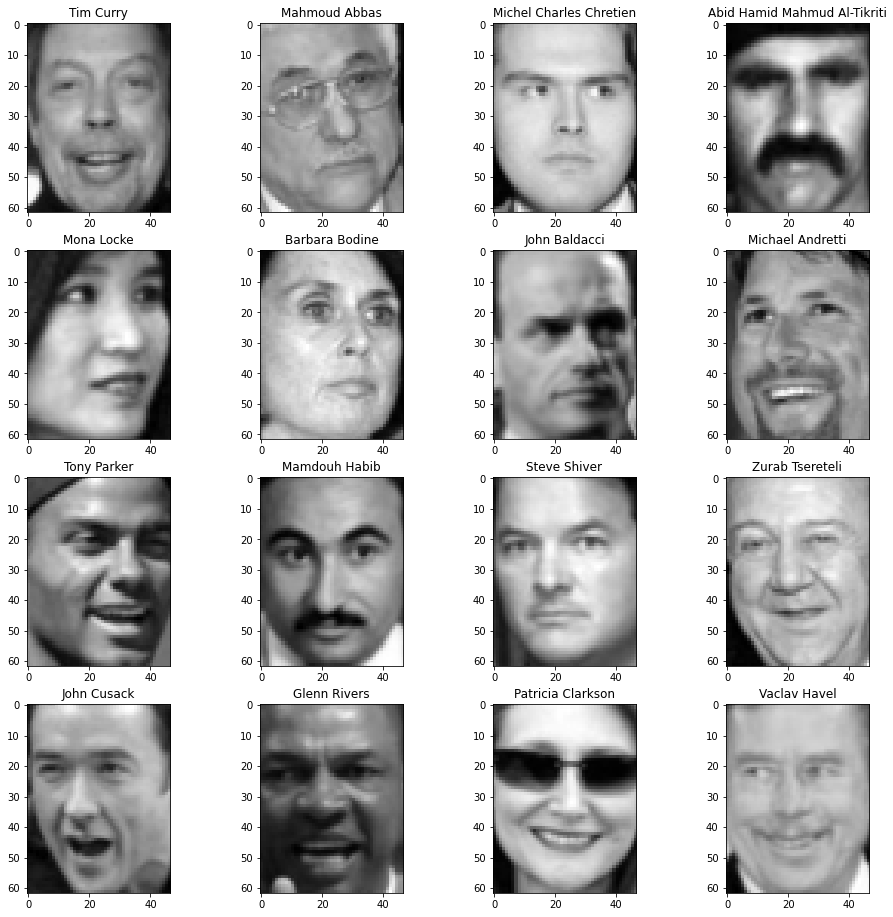

In [20]:
img_shape = people.images[0].shape

fig, ax = plt.subplots(4,4,figsize=(16,16))

for i in range(4):
    for j in range(4):
        ind = 4 * i + j
        ax[i, j].imshow(people.images[ind], cmap = 'gray')
        ax[i, j].set_title(people.target_names[people.target[ind]])

plt.show()

In [21]:
print('Shape:\t',people.images[0].shape)
print(people.images[0])
print(people.images[0].min())
print(people.images[0].max())

Shape:	 (62, 47)
[[ 34.        29.333334  22.333334 ...  20.        25.666666  30.666666]
 [ 37.333332  32.        25.333334 ...  21.        26.666666  32.      ]
 [ 33.333332  32.333332  40.333332 ...  23.666666  28.        35.666668]
 ...
 [166.        97.        44.333332 ...   9.666667  14.333333  12.333333]
 [ 64.        38.666668  30.       ...  12.666667  16.        14.      ]
 [ 30.666666  29.        26.333334 ...  14.666667  16.        14.      ]]
4.3333335
238.66667


In [22]:
print(people.images.shape)

(13233, 62, 47)


In [23]:
print(people.target)
print(people.target_names)
print(people.target.min())
print(people.target.max())

[5360 3434 3807 ... 2175  373 2941]
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']
0
5748


In [24]:
counts = np.bincount(people.target)
print(counts[:100])

[ 1  1  1  1  1  4  1  2  1  1  1  1  1  2  4  1  1  1  4  1 19  1  3  2
  1  4  3  1  1  1  1  1  1  1  1  1  4  2  3  1  1  3  2  1  1  1  2  1
  2  1  1  1 12  1  1  1  1  1  2  1  5  1  1  1  1  1  2  5  3  1  1  1
  1  1  2  1  1  1  3  3  1  1  1  2  8  1  3  7  1  1  2  1  1  5  1  1
  2  1  1  1]


In [25]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20)
print(people.keys())
print(people.DESCR)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Fac

In [26]:
print(people.images.shape)
print(people.target)
print(people.target_names)
print(len(people.target_names))
print(people.target.min())
print(people.target.max())

(3023, 62, 47)
[61 25  9 ... 14 15 14]
['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Si

In [27]:
counts = np.bincount(people.target)
for i in range(len(people.target_names)):
    print(people.target_names[i] + (30 - len(people.target_names[i])) * ' ' + str(counts[i]))

Alejandro Toledo              39
Alvaro Uribe                  35
Amelie Mauresmo               21
Andre Agassi                  36
Angelina Jolie                20
Ariel Sharon                  77
Arnold Schwarzenegger         42
Atal Bihari Vajpayee          24
Bill Clinton                  29
Carlos Menem                  21
Colin Powell                  236
David Beckham                 31
Donald Rumsfeld               121
George Robertson              22
George W Bush                 530
Gerhard Schroeder             109
Gloria Macapagal Arroyo       44
Gray Davis                    26
Guillermo Coria               30
Hamid Karzai                  22
Hans Blix                     39
Hugo Chavez                   71
Igor Ivanov                   20
Jack Straw                    28
Jacques Chirac                52
Jean Chretien                 55
Jennifer Aniston              21
Jennifer Capriati             42
Jennifer Lopez                21
Jeremy Greenstock             24
Jiang 

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [29]:
print(np.where(people.target == 4))

(array([  43,   74,  133,  221,  279,  486, 1026, 1272, 1454, 1581, 1665,
       1763, 1877, 1981, 2114, 2151, 2294, 2419, 2486, 2782]),)


In [30]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X = people.data[mask]
y = people.target[mask]

X = X / 255

In [31]:
counts = np.bincount(y)
for i in range(len(people.target_names)):
    print(people.target_names[i] + (30 - len(people.target_names[i])) * ' ' + str(counts[i]))

Alejandro Toledo              39
Alvaro Uribe                  35
Amelie Mauresmo               21
Andre Agassi                  36
Angelina Jolie                20
Ariel Sharon                  50
Arnold Schwarzenegger         42
Atal Bihari Vajpayee          24
Bill Clinton                  29
Carlos Menem                  21
Colin Powell                  50
David Beckham                 31
Donald Rumsfeld               50
George Robertson              22
George W Bush                 50
Gerhard Schroeder             50
Gloria Macapagal Arroyo       44
Gray Davis                    26
Guillermo Coria               30
Hamid Karzai                  22
Hans Blix                     39
Hugo Chavez                   50
Igor Ivanov                   20
Jack Straw                    28
Jacques Chirac                50
Jean Chretien                 50
Jennifer Aniston              21
Jennifer Capriati             42
Jennifer Lopez                21
Jeremy Greenstock             24
Jiang Zemi

In [32]:
from sklearn.neighbors import KNeighborsClassifier

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X = people.data[mask]
y = people.target[mask]

X = X / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

knn = KNeighborsClassifier().fit(X_train, y_train)
print('Train:\t', knn.score(X_train, y_train))
print('Test:\t', knn.score(X_test, y_test))

Train:	 0.47058823529411764
Test:	 0.21511627906976744


In [33]:
X_sca = StandardScaler().fit(X).transform(X)

X_train_sca, X_test_sca, y_train, y_test = train_test_split(X_sca, y, random_state = 0)
knn = KNeighborsClassifier().fit(X_train_sca, y_train)
print('Train:\t', knn.score(X_train_sca, y_train))
print('Test:\t', knn.score(X_test_sca, y_test))

Train:	 0.46283128636069815
Test:	 0.22868217054263565


In [34]:
X_pca = PCA(n_components = 100).fit(X).transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state = 0)
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
print('Train:\t', knn.score(X_train_pca, y_train))
print('Test:\t', knn.score(X_test_pca, y_test))

Train:	 0.4725274725274725
Test:	 0.21705426356589147


In [35]:
X_pca = PCA(n_components = 100).fit(X).transform(X)
X_pca = StandardScaler().fit(X).transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state = 0)
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
print('Train:\t', knn.score(X_train_pca, y_train))
print('Test:\t', knn.score(X_test_pca, y_test))

Train:	 0.46283128636069815
Test:	 0.22868217054263565


In [36]:
X_pca = PCA(n_components = 100, whiten = True).fit(X).transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state = 0)
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
print('Train:\t', knn.score(X_train_pca, y_train))
print('Test:\t', knn.score(X_test_pca, y_test))

Train:	 0.5681965093729799
Test:	 0.28488372093023256


In [37]:
print(X_pca.shape)
print(X.shape)
pca = PCA(n_components = 100, whiten = True).fit(X)
print(pca.components_.shape)
print(pca.components_)

(2063, 100)
(2063, 2914)
(100, 2914)
[[-0.00520102 -0.0061997  -0.00745744 ... -0.00721302 -0.00644709
  -0.00523651]
 [ 0.01756297  0.01767246  0.01869489 ... -0.03303413 -0.03204147
  -0.02989754]
 [-0.04366999 -0.04598266 -0.0486061  ... -0.00291296 -0.00210997
  -0.00077949]
 ...
 [ 0.02469942  0.01301404 -0.00196369 ...  0.00421536 -0.00491937
  -0.00582332]
 [-0.0163369  -0.01245526 -0.00234799 ... -0.0400336  -0.00278352
   0.04165168]
 [-0.01441032 -0.01446622 -0.00749501 ...  0.0113258   0.03801364
   0.04611623]]


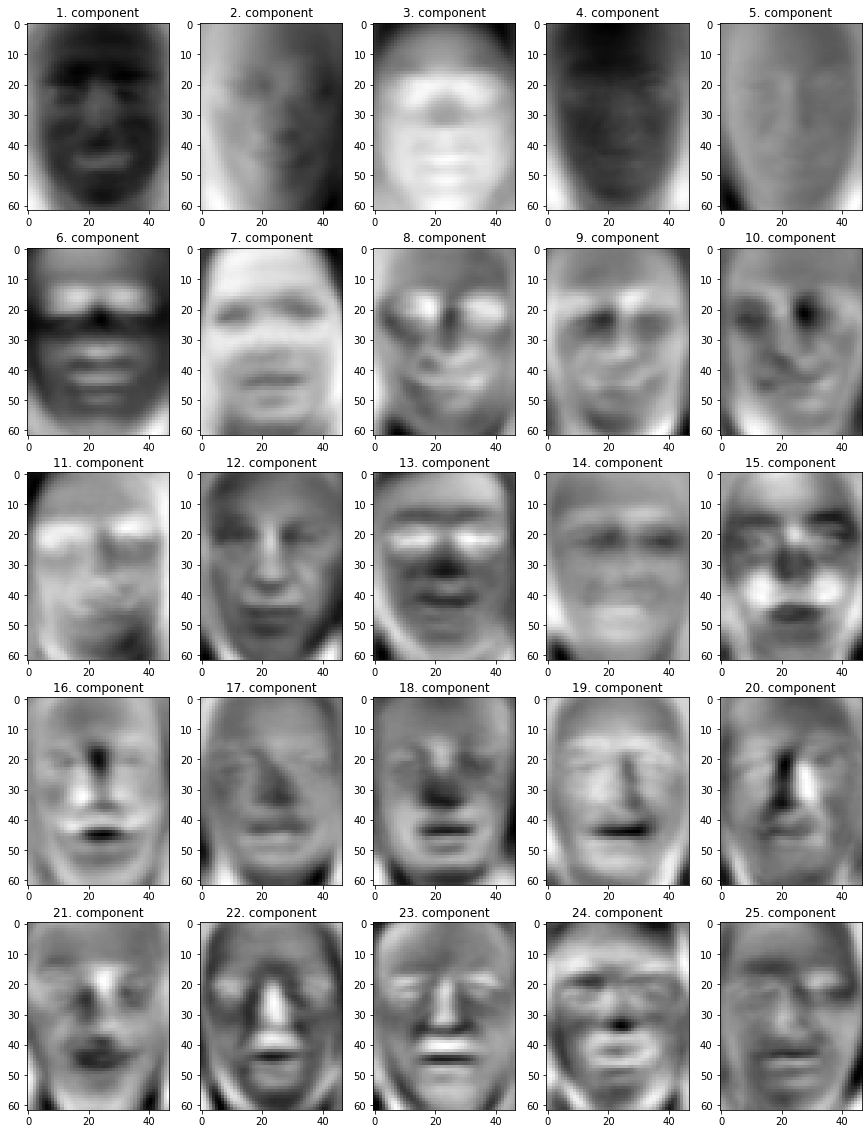

In [38]:
n = 5
fig, ax = plt.subplots(n,n,figsize=(15,20))
for i in range(n):
    for j in range(n):
        ind = n * i + j
        ax[i, j].imshow(pca.components_[ind].reshape((62,47)), cmap = 'gray')
        ax[i, j].set_title(str(ind+1)+'. component')
plt.show()

In [39]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X = people.data[mask]
y = people.target[mask]

pca = PCA(n_components = 500, whiten = False)
X_pca = pca.fit(X).transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, random_state = 0)
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
print('Train:\t', knn.score(X_train_pca, y_train))
print('Test:\t', knn.score(X_test_pca, y_test))

Train:	 0.4718810601163542
Test:	 0.22674418604651161


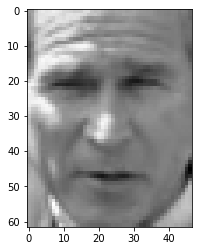

In [40]:
plt.imshow(X[10].reshape(62,47), cmap='gray')
plt.show()

In [41]:
print(X_pca[10].shape)
print(pca.components_.shape)
print(np.matmul(X_pca[10],pca.components_).shape)

(500,)
(500, 2914)
(2914,)


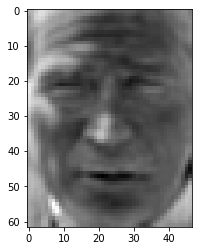

In [42]:
plt.imshow(np.matmul(X_pca[10][:500],pca.components_[:500]).reshape(62,47), cmap='gray')
plt.show()

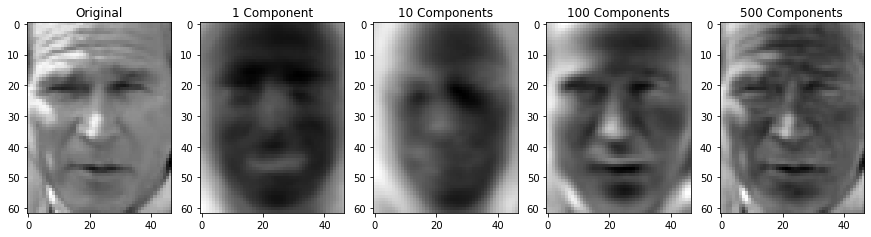

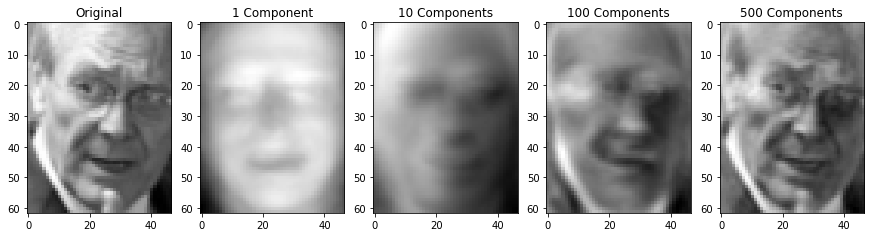

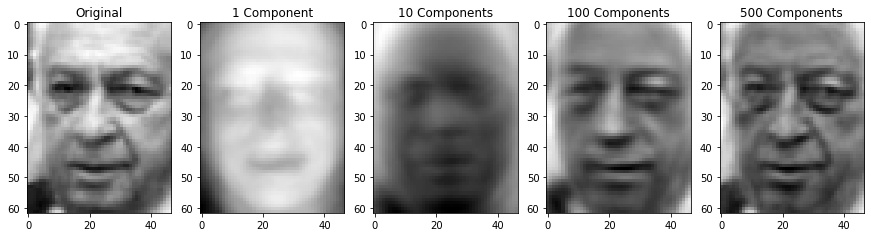

In [43]:
n_comp = [1,10,100,500]

fig, axes = plt.subplots(1,len(n_comp) + 1,figsize=(15,5))

ind = 10

for i, ax, n in zip(range(len(n_comp) + 1), axes.ravel(), [0] + n_comp):
    if i == 0:
        ax.imshow(X[ind].reshape(62,47), cmap='gray')
        ax.set_title('Original')
    else:
        ax.imshow(np.matmul(X_pca[ind][:n],pca.components_[:n]).reshape(62,47), cmap='gray')
        ax.set_title(('{} Component' if n == 1 else '{} Components').format(n))
        
fig, axes = plt.subplots(1,len(n_comp) + 1,figsize=(15,5))

ind = 20

for i, ax, n in zip(range(len(n_comp) + 1), axes.ravel(), [0] + n_comp):
    if i == 0:
        ax.imshow(X[ind].reshape(62,47), cmap='gray')
        ax.set_title('Original')
    else:
        ax.imshow(np.matmul(X_pca[ind][:n],pca.components_[:n]).reshape(62,47), cmap='gray')
        ax.set_title(('{} Component' if n == 1 else '{} Components').format(n))
        
fig, axes = plt.subplots(1,len(n_comp) + 1,figsize=(15,5))

ind = 30

for i, ax, n in zip(range(len(n_comp) + 1), axes.ravel(), [0] + n_comp):
    if i == 0:
        ax.imshow(X[ind].reshape(62,47), cmap='gray')
        ax.set_title('Original')
    else:
        ax.imshow(np.matmul(X_pca[ind][:n],pca.components_[:n]).reshape(62,47), cmap='gray')
        ax.set_title(('{} Component' if n == 1 else '{} Components').format(n))
        


In [44]:
from sklearn.decomposition import NMF

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X = people.data[mask]
y = people.target[mask]

# nmf10 = NMF(n_components = 10, random_state = 0).fit(X)
# nmf50 = NMF(n_components = 50, random_state = 0).fit(X)
# nmf100 = NMF(n_components = 100, random_state = 0).fit(X)
# nmf500 = NMF(n_components = 500, max_iter = 50, random_state = 0).fit(X)

nmf = NMF(n_components = 16, random_state = 0).fit(X)
X_nmf = nmf.transform(X)

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


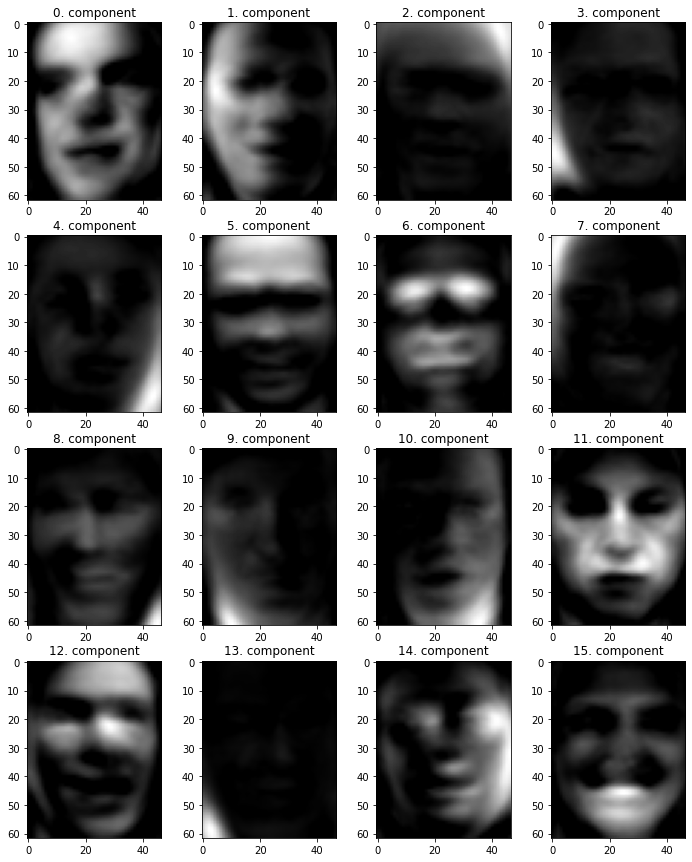

In [45]:
n = 4
fig, ax = plt.subplots(n,n,figsize=(12,15))
for i in range(n):
    for j in range(n):
        ind = n * i + j
        ax[i, j].imshow(nmf.components_[ind].reshape((62,47)), cmap = 'gray')
        ax[i, j].set_title(str(ind)+'. component')
plt.show()

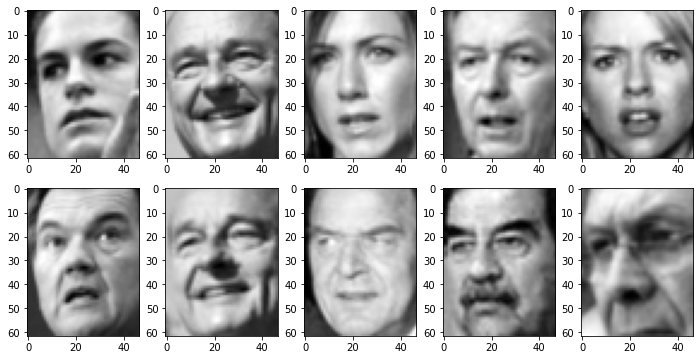

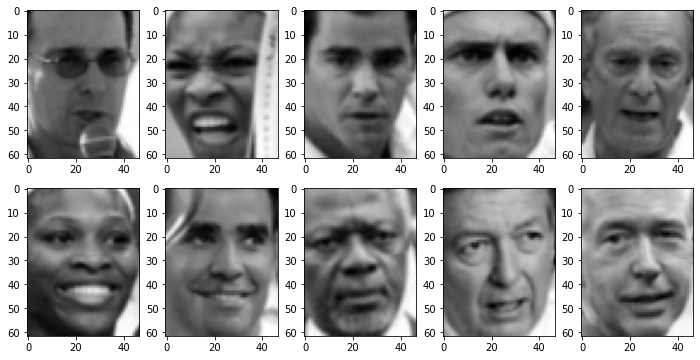

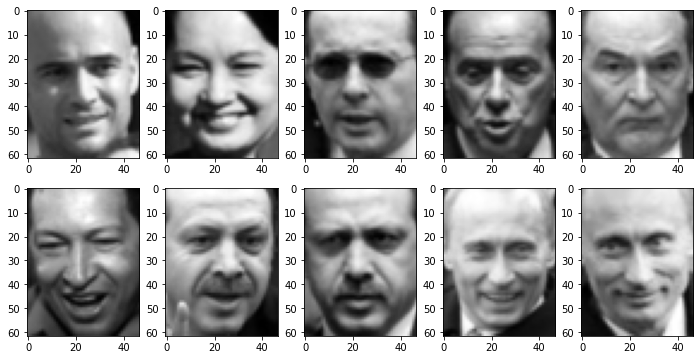

In [46]:
X_nmf = nmf.transform(X)

ind = np.argsort(X_nmf[:,0])
# print(ind)

fig, ax = plt.subplots(2,5,figsize=(12,6))

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[ind[- 1 - 5 * i - j]].reshape(62,47), cmap = 'gray')

ind = np.argsort(X_nmf[:,4])
# print(ind)

fig, ax = plt.subplots(2,5,figsize=(12,6))

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[ind[- 1 - 5 * i - j]].reshape(62,47), cmap = 'gray')

ind = np.argsort(X_nmf[:,5])
# print(ind)

fig, ax = plt.subplots(2,5,figsize=(12,6))

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X[ind[- 1 - 5 * i - j]].reshape(62,47), cmap = 'gray')



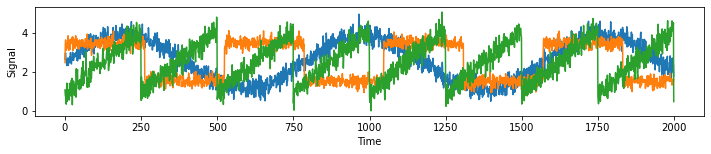

(2000, 3)
[[2.65408203 2.48908887 1.07757433]
 [2.94981947 3.45507031 0.79929765]
 [2.97649958 3.65235694 0.73473133]
 ...
 [2.22337048 1.33481395 4.31421863]
 [2.36722058 1.56522921 4.53698235]
 [1.77945297 1.62362822 0.47660599]]


In [47]:
import mglearn

S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()
print(S.shape)
print(S)

In [48]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))
print(S)
print(X)
print(A.T)

Shape of measurements: (2000, 100)
[[2.65408203 2.48908887 1.07757433]
 [2.94981947 3.45507031 0.79929765]
 [2.97649958 3.65235694 0.73473133]
 ...
 [2.22337048 1.33481395 4.31421863]
 [2.36722058 1.56522921 4.53698235]
 [1.77945297 1.62362822 0.47660599]]
[[3.88628829 3.19667802 4.41951286 ... 2.61424389 2.02086225 5.74538084]
 [4.57171766 3.58732579 5.14219507 ... 3.39605065 2.36153667 6.67280745]
 [4.68853914 3.64374175 5.26758468 ... 3.54963822 2.413116   6.82571726]
 ...
 [4.77531347 4.56350593 6.32072136 ... 2.22079964 1.85839553 7.36088845]
 [5.1533247  4.88338574 6.80381553 ... 2.47221245 2.00543108 7.92312939]
 [2.42507009 1.96528889 2.68586111 ... 1.6689038  1.32070881 3.57182835]]
[[0.5488135  0.54488318 0.43758721 0.38344152 0.56804456 0.0871293
  0.77815675 0.79915856 0.11827443 0.94466892 0.26455561 0.56843395
  0.61209572 0.6818203  0.6976312  0.67063787 0.31542835 0.43860151
  0.20887676 0.2532916  0.15896958 0.13818295 0.82099323 0.09609841
  0.97676109 0.03918779 0.29

In [49]:
a = np.array([[1,2],[3,4]])
print(a)
print(a.T)
print(np.matmul(a,a))
print(np.dot(a,a))

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


In [50]:
nmf = NMF(n_components=3, random_state=0)
S_nmf = nmf.fit(X).transform(X)
print("Recovered signal shape: {}".format(S_nmf.shape))
print("Components shape:       {}".format(nmf.components_.shape))

Recovered signal shape: (2000, 3)
Components shape:       (3, 100)


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [51]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

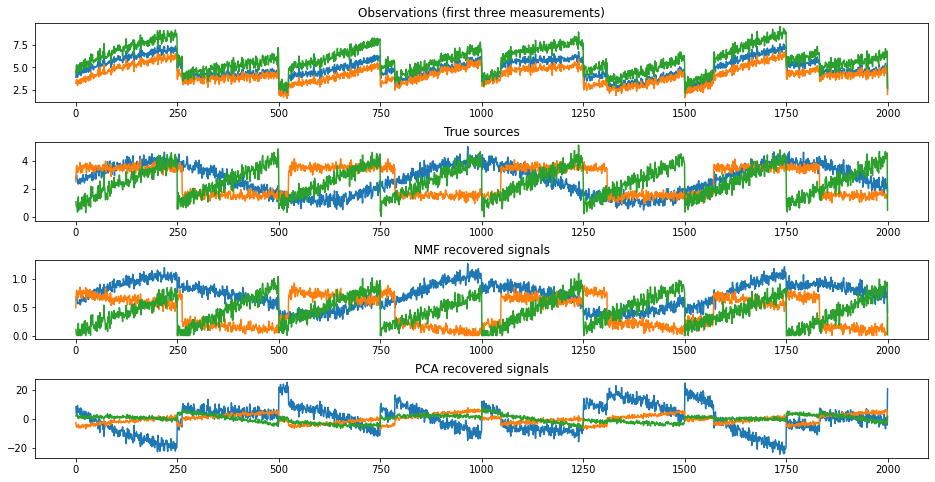

In [52]:
models = [X, S, S_nmf, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(16, 8), gridspec_kw={'hspace': 0.5})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

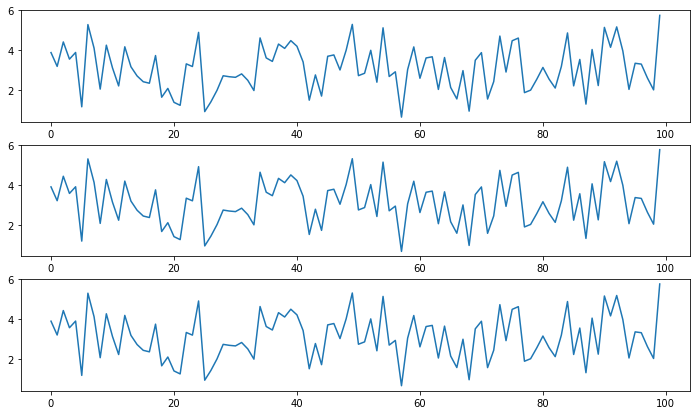

In [53]:
fig, ax = plt.subplots(3,1,figsize=(12,7))

for i in range(3):
    ax[i].plot(np.matmul(S_nmf[0], nmf.components_))

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = (digits.data, digits.target)
print(X[:3])
print(X[0].reshape(8,8))
print(y[:30])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.

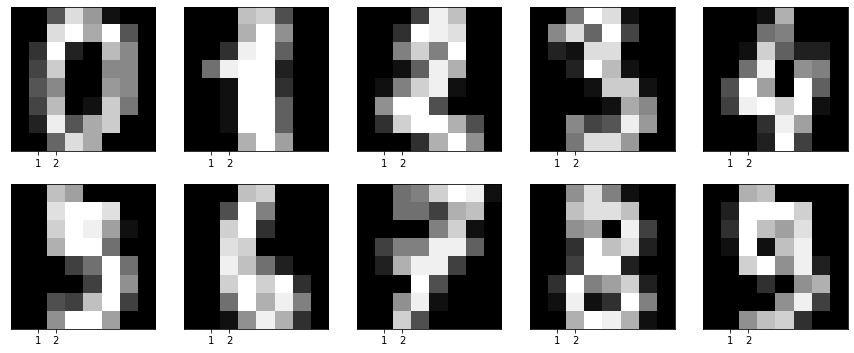

In [55]:
fig, axes = plt.subplots(2,5, figsize = (15, 6), subplot_kw={'xticks':(1,2), 'yticks': ()})

for i, ax in zip(range(10), axes.ravel()):
    ax.imshow(X[i].reshape(8,8), cmap = 'gray')

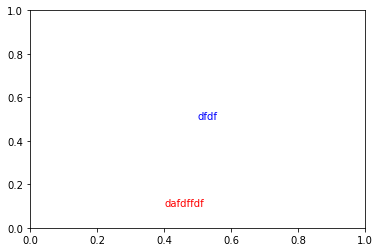

In [56]:
plt.text(0.5,0.5,'dfdf', color = 'blue')
plt.text(0.4,0.1,'dafdffdf', color = 'red')
plt.show()

In [91]:
from sklearn.decomposition import PCA

X, y = (digits.data, digits.target)
pca = PCA(n_components = 2).fit(X)
X_pca = pca.fit_transform(X)

In [92]:
print(X_pca)
X_pca = MinMaxScaler().fit(X_pca).transform(X_pca)
print(X_pca)

[[ -1.25946676  21.27488262]
 [  7.95761147 -20.76870082]
 [  6.99192342  -9.95598417]
 ...
 [ 10.80128365  -6.96025138]
 [ -4.87209837  12.42395419]
 [ -0.34438998   6.36555126]]
[[0.47575032 0.84688602]
 [0.6223556  0.11679353]
 [0.60699553 0.30455781]
 ...
 [0.66758656 0.35657911]
 [0.41828842 0.69318846]
 [0.49030538 0.58798347]]


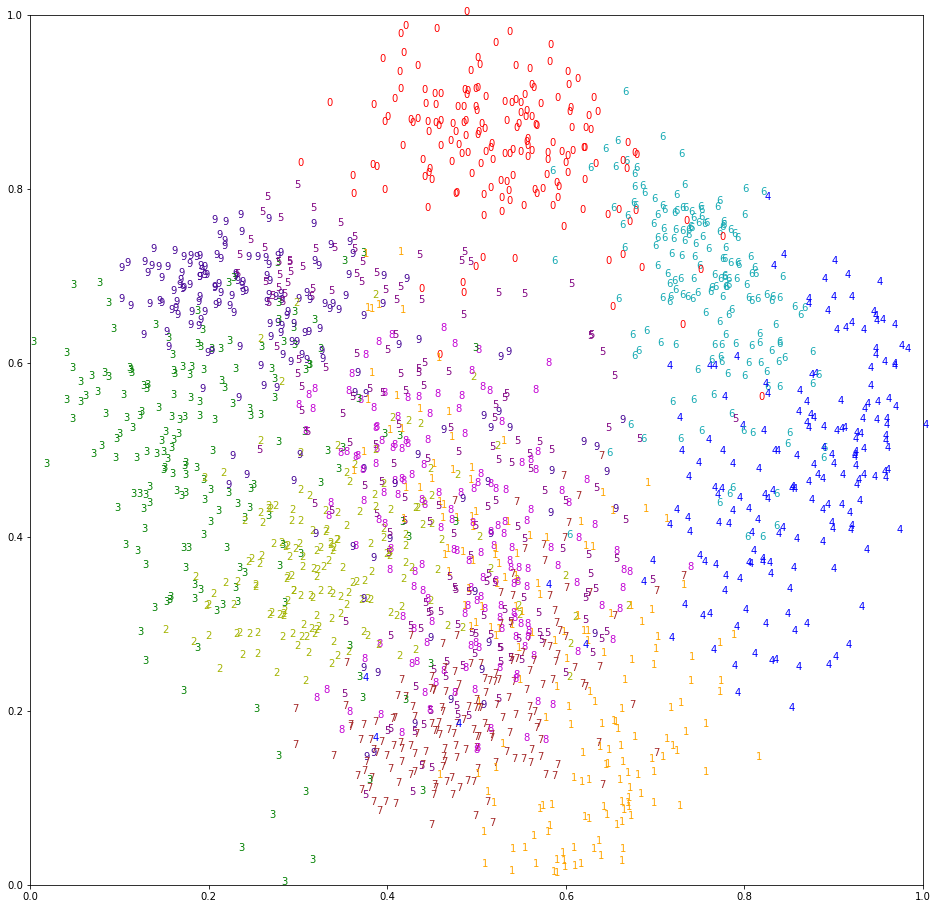

In [94]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
colors = ['red', 'orange', '#A4B403', 'green', 'blue', 'purple', '#13A9B3', 'brown', '#C303D4', '#430194']
for i in range(len(y)):
    plt.text(X_pca[i][0], X_pca[i][1], str(y[i]), color = colors[y[i]])
plt.show()

In [68]:
from sklearn.manifold import TSNE

X, y = (digits.data, digits.target)
tsne = TSNE(n_components = 2).fit(X)
X_tsne = tsne.fit_transform(X)

In [74]:
print(X_tsne)
X_tsne = MinMaxScaler().fit(X_tsne).transform(X_tsne)
print(X_tsne)

[[-44.68053    31.790781 ]
 [  1.0931736  23.577312 ]
 [ 10.886513   17.772575 ]
 ...
 [  8.585197    4.4202557]
 [ 12.155322  -21.626091 ]
 [ 10.243427   -1.9738958]]
[[0.16016153 0.7393688 ]
 [0.530847   0.6806761 ]
 [0.6101556  0.6391959 ]
 ...
 [0.59151906 0.54378146]
 [0.6204307  0.35765657]
 [0.60494775 0.4980894 ]]


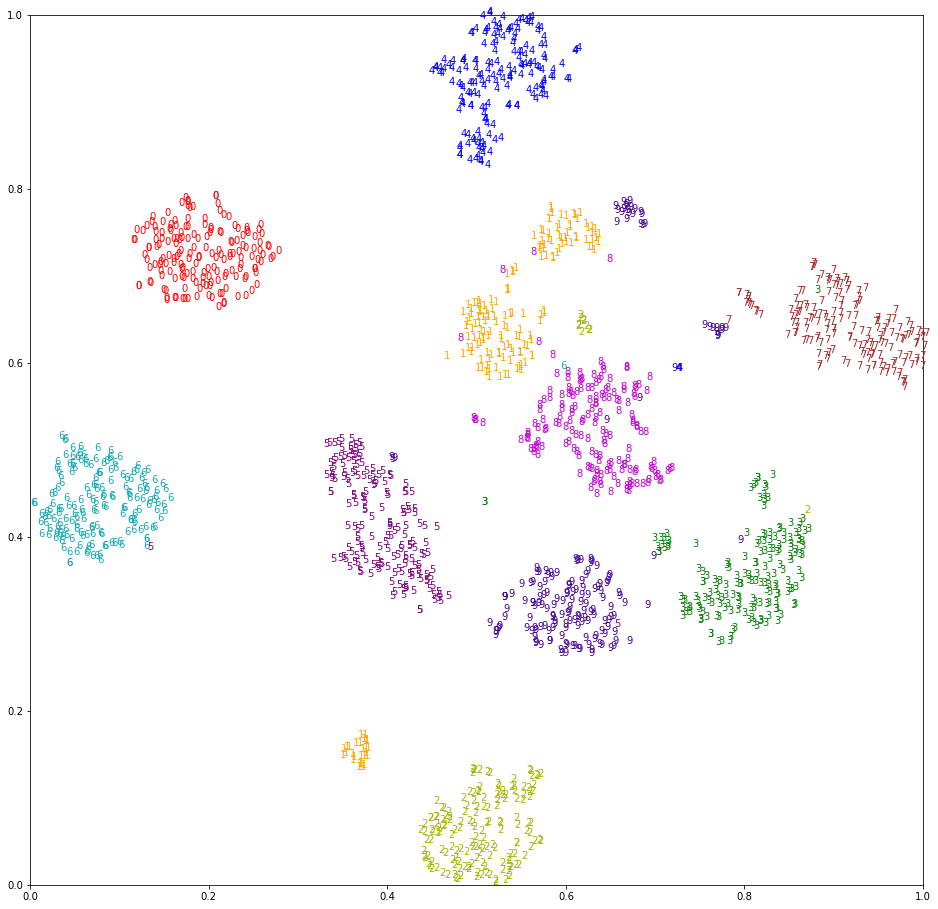

In [95]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
colors = ['red', 'orange', '#A4B403', 'green', 'blue', 'purple', '#13A9B3', 'brown', '#C303D4', '#430194']
for i in range(len(y)):
    plt.text(X_tsne[i][0], X_tsne[i][1], str(y[i]), color = colors[y[i]])
plt.show()

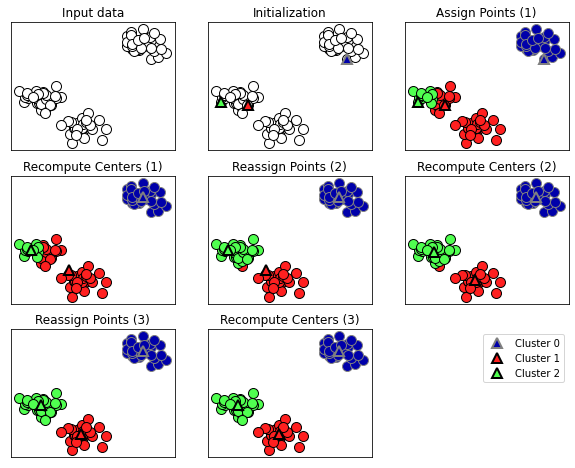

In [110]:
mglearn.plots.plot_kmeans_algorithm()

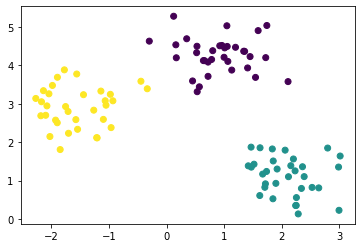

In [124]:
X, y = make_blobs(n_samples = 100, centers = 3, cluster_std = 0.5, random_state = 0)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

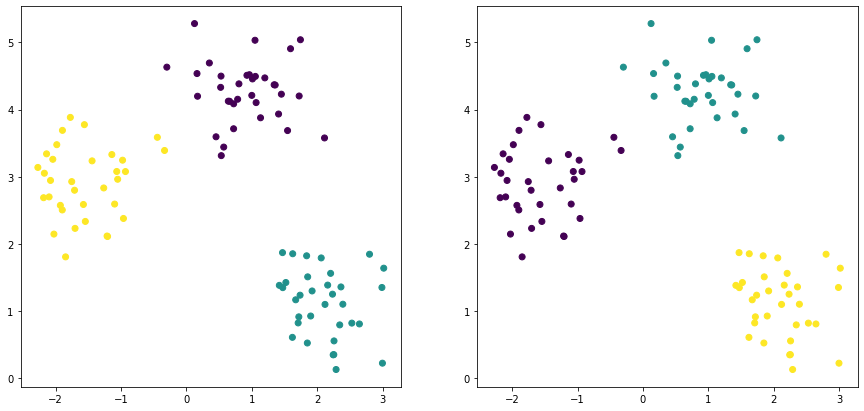

In [126]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y_predict = kmeans.predict(X)

fig, ax = plt.subplots(1, 2, figsize = (15,7))
ax[0].scatter(X[:,0], X[:,1], c = y)
ax[1].scatter(X[:,0], X[:,1], c = y_predict)
plt.show()

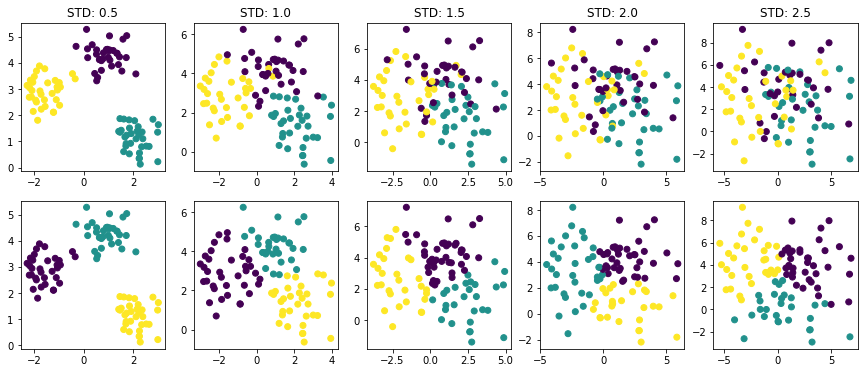

In [136]:
n = 5
std_list = np.linspace(0.5,2.5,n)

fig, ax = plt.subplots(2,n,figsize=(15,6), gridspec_kw = {'hspace': 0.2, 'wspace': 0.2})

for i in range(n):
    X, y = make_blobs(n_samples = 100, centers = 3, cluster_std = std_list[i], random_state = 0)
    kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
    y_predict = kmeans.predict(X)
    ax[0,i].scatter(X[:,0], X[:,1], c = y)
    ax[0,i].set_title('STD: '+str(std_list[i]))
    ax[1,i].scatter(X[:,0], X[:,1], c = y_predict)

Text(0, 0.5, 'Feature 1')

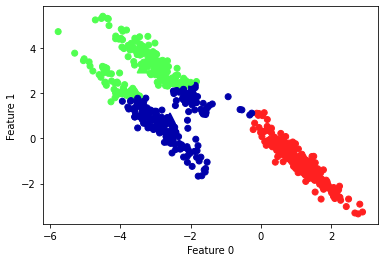

In [137]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

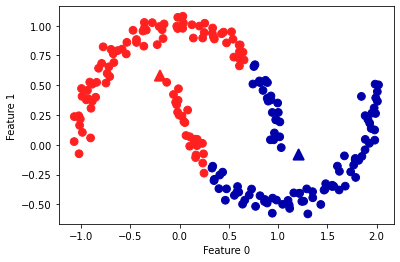

In [138]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [143]:
print(people.data.shape)
pca = PCA(n_components = 5).fit(people.data)
nmf = NMF(n_components = 5).fit(people.data)
kmeans = KMeans(n_clusters = 5).fit(people.data)

(3023, 2914)


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


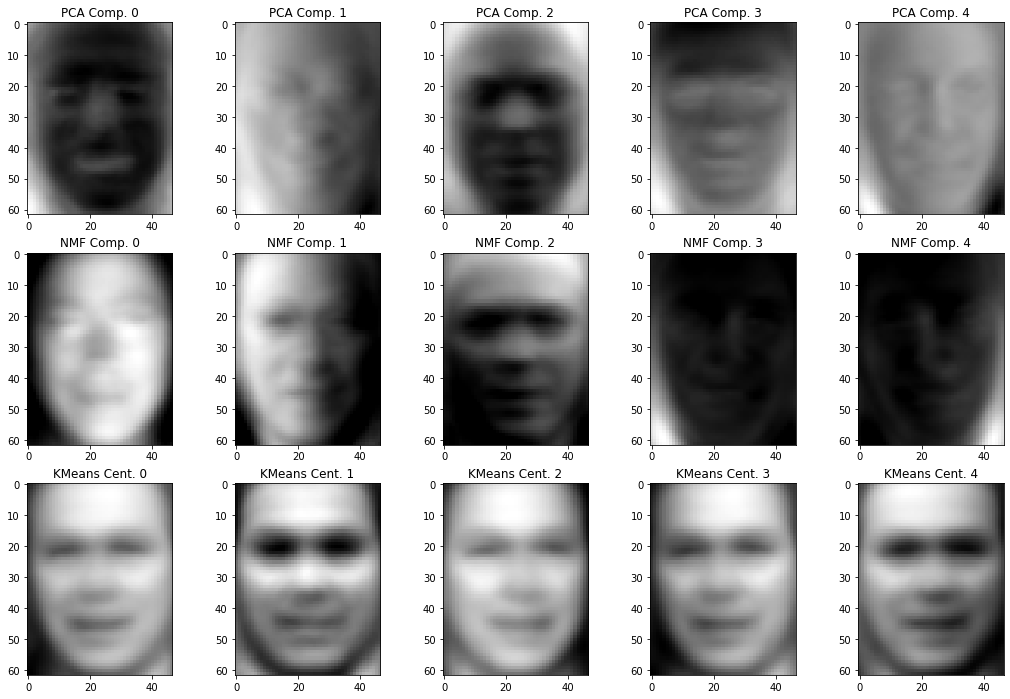

In [151]:
fig, ax = plt.subplots(3,5,figsize=(18,12))

for i in range(3):
    for j in range(5):
        if i == 0:
            ax[i, j].imshow(pca.components_[j].reshape(62,47), cmap = 'gray')
            ax[i, j].set_title('PCA Comp. ' + str(j))
        elif i == 1:
            ax[i, j].imshow(nmf.components_[j].reshape(62,47), cmap = 'gray')
            ax[i, j].set_title('NMF Comp. ' + str(j))
        else:
            ax[i, j].imshow(kmeans.cluster_centers_[j].reshape(62,47), cmap = 'gray')
            ax[i, j].set_title('KMeans Cent. ' + str(j))

In [172]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20)

mask = np.zeros(people.target.shape, dtype = np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X = people.data[mask]
y = people.target[mask]

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

In [178]:
pca = PCA(n_components = 100).fit(X)
nmf = NMF(n_components = 100, max_iter = 200).fit(X)
kmeans = KMeans(n_clusters = 100, max_iter = 50).fit(X)

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [197]:
faces = [X[i] for i in range(5)]

kmeans_reconstructions = [kmeans.cluster_centers_[kmeans.predict(face.reshape(1,-1))] for face in faces]
# kmeans.cluster_centers_[kmeans.predict(people.data[i].reshape(1,-1))]
pca_reconstructions = [np.dot(pca.transform(face.reshape(1,-1)), pca.components_) for face in faces]
nmf_reconstructions = [np.dot(nmf.transform(face.reshape(1,-1)), nmf.components_) for face in faces]

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


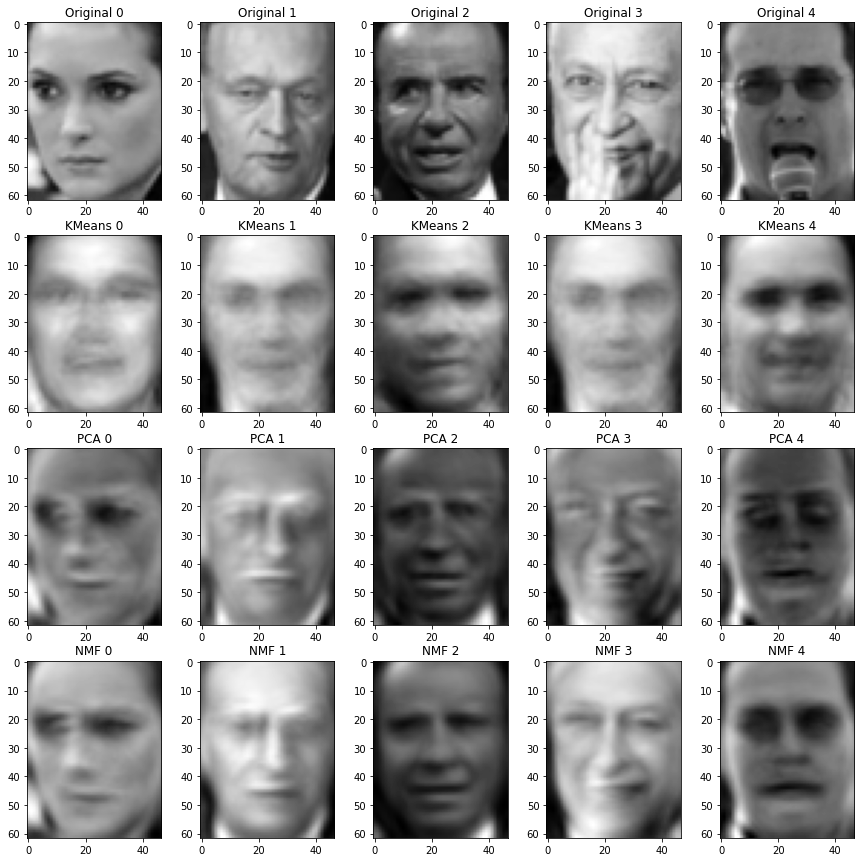

In [198]:
fig, ax = plt.subplots(4,5,figsize=(15,15))

for i in range(4):
    for j in range(5):
        ind = 4 * i + j
        if i == 0:
            ax[i, j].set_title(f'Original {j}')
            ax[i, j].imshow(faces[j].reshape(62,47), cmap = 'gray')
        elif i == 1:
            ax[i, j].set_title(f'KMeans {j}')
            ax[i, j].imshow(kmeans_reconstructions[j].reshape(62,47), cmap = 'gray')
        elif i == 2:
            ax[i, j].set_title(f'PCA {j}')
            ax[i, j].imshow(pca_reconstructions[j].reshape(62,47), cmap = 'gray')
        elif i == 3:
            ax[i, j].set_title(f'NMF {j}')
            ax[i, j].imshow(nmf_reconstructions[j].reshape(62,47), cmap = 'gray')

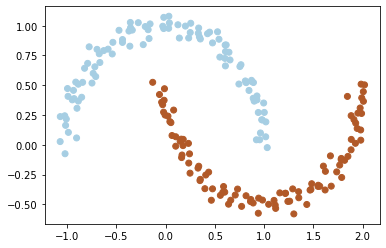

In [218]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Paired')
plt.show()

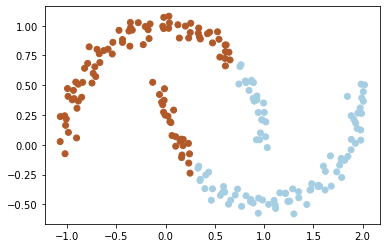

In [220]:
kmeans2 = KMeans(n_clusters = 2).fit(X)
plt.scatter(X[:,0], X[:,1], c = kmeans2.predict(X), cmap = 'Paired')
plt.show()

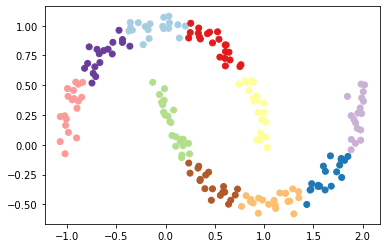

In [221]:
kmeans10 = KMeans(n_clusters = 10).fit(X)
plt.scatter(X[:,0], X[:,1], c = kmeans10.predict(X), cmap = 'Paired')
plt.show()

In [236]:
distance_features = kmeans10.transform(X)
print(distance_features)
print(kmeans10.predict(X))
# print(distance_features.min(axis = 1))
print(distance_features.min(axis = 1)[:30])

[[1.03852189 1.13956805 0.82573711 ... 1.46553151 0.23340263 0.9220768 ]
 [2.20414144 0.1199124  1.64355994 ... 2.51721597 0.98271691 1.14159679]
 [0.71561277 1.74914157 0.13801913 ... 0.77354687 0.94399739 0.78786246]
 ...
 [1.03195812 1.48991975 0.20648163 ... 1.10631579 0.81205971 0.44639122]
 [0.23892095 1.98056306 0.83973107 ... 0.79790385 1.05774337 1.38951924]
 [2.11331394 0.04506731 1.60085948 ... 2.4536383  0.88166689 1.14920754]]
[8 1 2 3 1 6 8 5 8 5 7 9 1 5 7 8 4 9 4 7 6 5 0 5 0 2 1 6 2 0 8 0 5 2 4 6 9
 8 3 2 9 7 4 2 1 0 8 7 2 5 7 9 6 3 5 4 4 5 4 0 9 3 1 8 5 3 0 1 0 3 9 3 9 2
 5 3 2 8 4 9 6 0 9 6 2 0 8 0 9 6 4 8 6 7 6 1 1 9 3 2 5 6 0 8 3 2 3 7 1 4 7
 0 0 3 8 1 4 6 9 8 8 7 2 0 2 7 8 2 5 6 8 7 3 9 5 1 5 3 6 8 2 2 4 0 7 8 2 5
 4 2 9 1 8 4 9 0 5 9 4 4 2 5 4 1 9 1 4 9 1 5 4 3 3 7 2 5 6 7 7 4 1 3 6 1 6
 4 0 5 3 7 3 4 8 8 2 7 6 2 0 1]
[0.23340263 0.1199124  0.13801913 0.38105696 0.15344916 0.29526528
 0.11601783 0.19975248 0.05799949 0.07296326 0.27816778 0.25049326
 0.2173757  0.1

In [250]:
X_clusters = np.array([distance_features[i] == distance_features.min(axis = 1)[i] for i in range(distance_features.shape[0])], dtype = int)
print(X_clusters)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [254]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X, y)
print('X:\t\t', sgd.score(X, y))

sgd = SGDClassifier().fit(X_clusters, y)
print('X_clusters:\t', sgd.score(X_clusters, y))

X:		 0.86
X_clusters:	 1.0


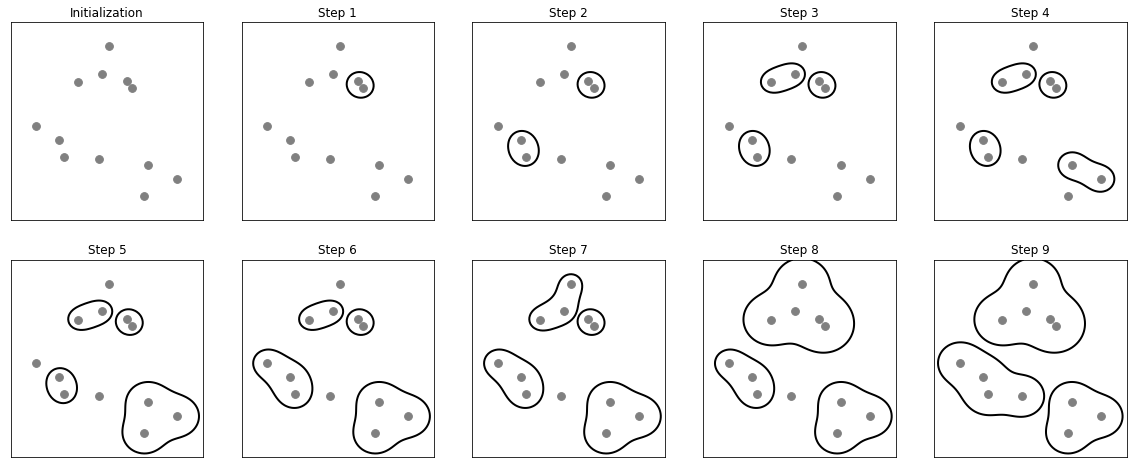

In [255]:
mglearn.plots.plot_agglomerative_algorithm()

In [288]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
average = AgglomerativeClustering(linkage = 'average', n_clusters = 3)

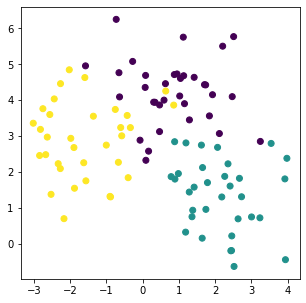

In [295]:
X, y = make_blobs(n_samples = 100, centers = 3, random_state = 0, cluster_std = 1)
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

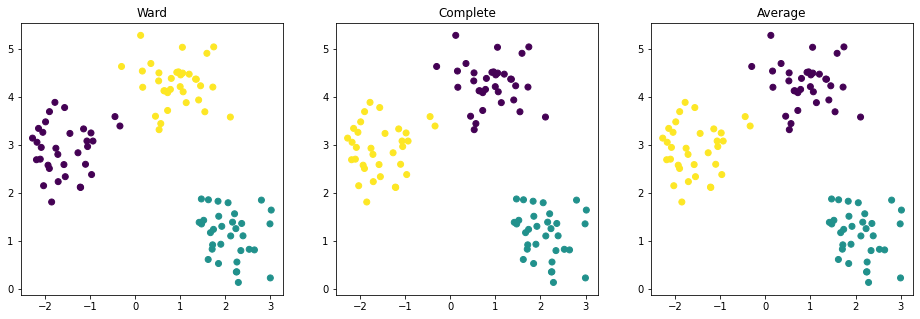

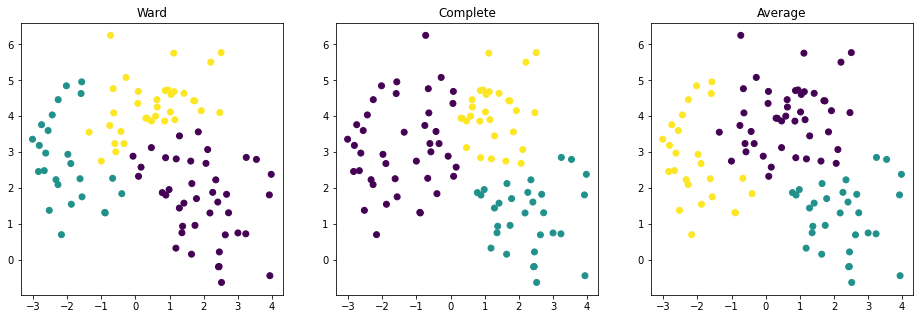

In [298]:
ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
average = AgglomerativeClustering(linkage = 'average', n_clusters = 3)

algorithms = [ward, complete, average]
names = ['ward', 'complete', 'average']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

X, y = make_blobs(n_samples = 100, centers = 3, random_state = 0, cluster_std = 0.5)

for name, alg, ax in zip(names, algorithms, axes.ravel()):
    ax.scatter(X[:,0], X[:,1], c = alg.fit_predict(X))
    ax.set_title(name.capitalize())
    
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

X, y = make_blobs(n_samples = 100, centers = 3, random_state = 0, cluster_std = 1)

for name, alg, ax in zip(names, algorithms, axes.ravel()):
    ax.scatter(X[:,0], X[:,1], c = alg.fit_predict(X))
    ax.set_title(name.capitalize())

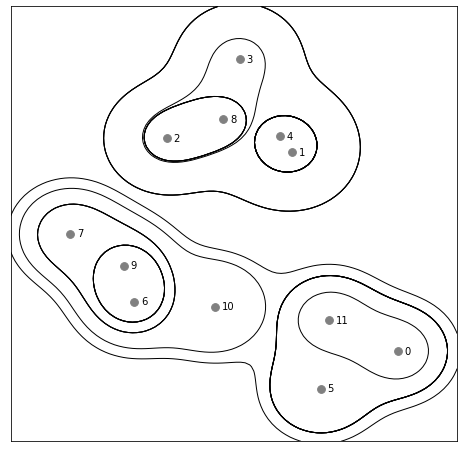

In [292]:
fig, ax = plt.subplots(figsize=(8,8))
mglearn.plots.plot_agglomerative()

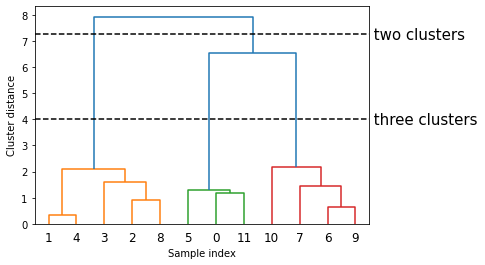

In [301]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

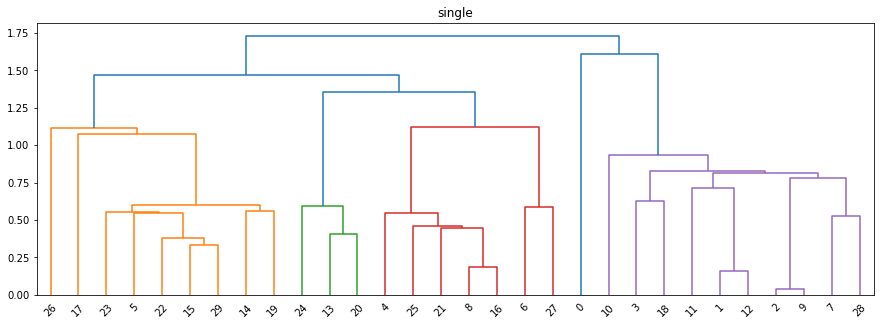

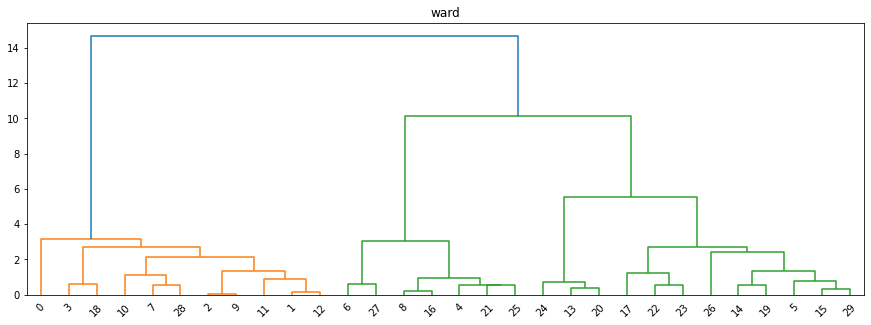

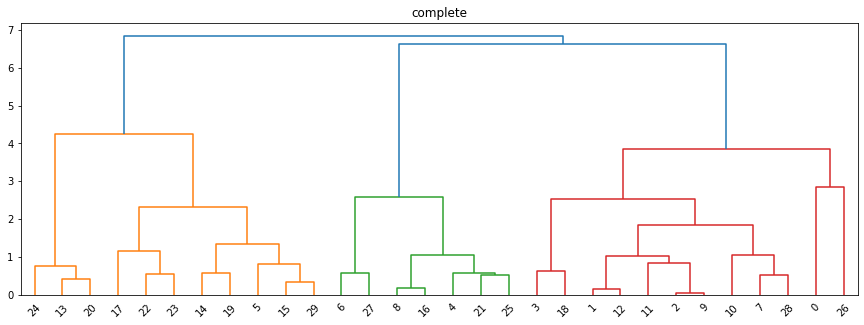

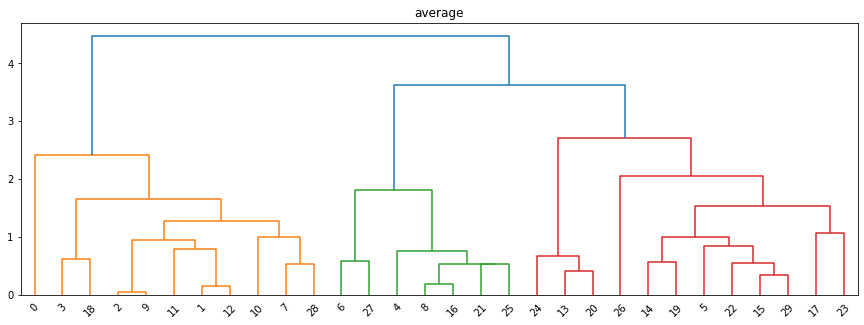

In [314]:
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(n_samples = 30, centers = 3, random_state = 0, cluster_std = 1)

plt.figure(figsize=(15,5))
Z = linkage(X, 'single')
dendrogram(Z)
plt.title('single')

plt.figure(figsize=(15,5))
Z = linkage(X, 'ward')
dendrogram(Z)
plt.title('ward')

plt.figure(figsize=(15,5))
Z = linkage(X, 'complete')
dendrogram(Z)
plt.title('complete')

plt.figure(figsize=(15,5))
Z = linkage(X, 'average')
dendrogram(Z)
plt.title('average')

plt.show()

In [316]:
print(Z)

[[2.00000000e+00 9.00000000e+00 3.82713656e-02 2.00000000e+00]
 [1.00000000e+00 1.20000000e+01 1.57507837e-01 2.00000000e+00]
 [8.00000000e+00 1.60000000e+01 1.82749580e-01 2.00000000e+00]
 [1.50000000e+01 2.90000000e+01 3.32094505e-01 2.00000000e+00]
 [1.30000000e+01 2.00000000e+01 4.03456388e-01 2.00000000e+00]
 [2.10000000e+01 2.50000000e+01 5.22485781e-01 2.00000000e+00]
 [7.00000000e+00 2.80000000e+01 5.29379585e-01 2.00000000e+00]
 [3.20000000e+01 3.50000000e+01 5.33487323e-01 4.00000000e+00]
 [2.20000000e+01 3.30000000e+01 5.41293000e-01 3.00000000e+00]
 [1.40000000e+01 1.90000000e+01 5.62615060e-01 2.00000000e+00]
 [6.00000000e+00 2.70000000e+01 5.83368373e-01 2.00000000e+00]
 [3.00000000e+00 1.80000000e+01 6.23814513e-01 2.00000000e+00]
 [2.40000000e+01 3.40000000e+01 6.70882258e-01 3.00000000e+00]
 [4.00000000e+00 3.70000000e+01 7.62024683e-01 5.00000000e+00]
 [1.10000000e+01 3.10000000e+01 7.84064831e-01 3.00000000e+00]
 [5.00000000e+00 3.80000000e+01 8.43208379e-01 4.000000

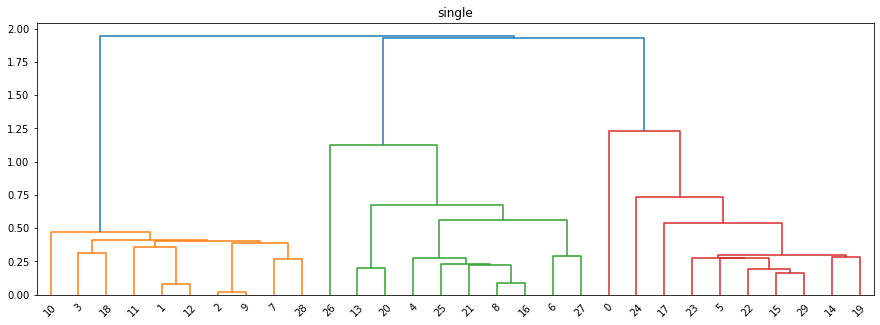

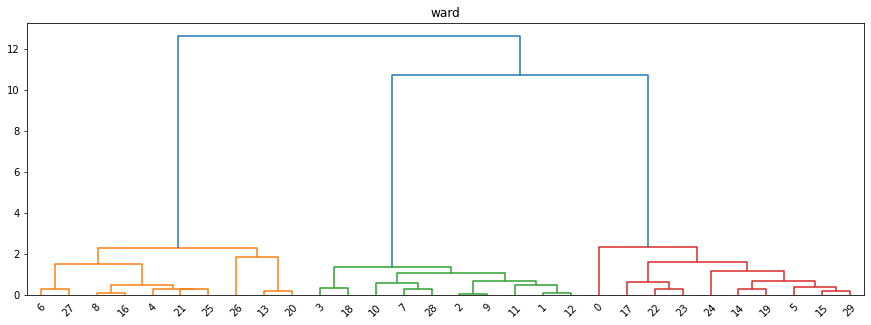

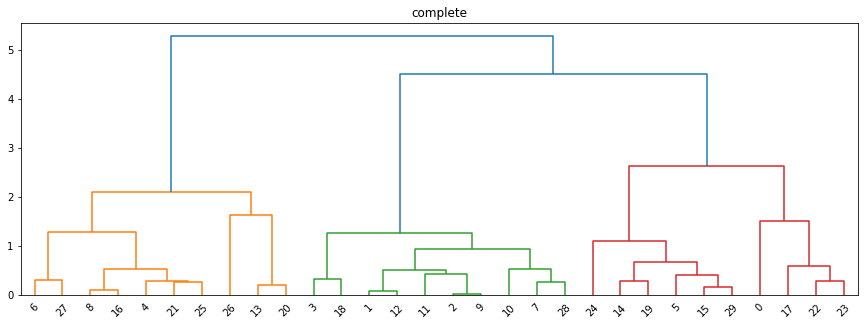

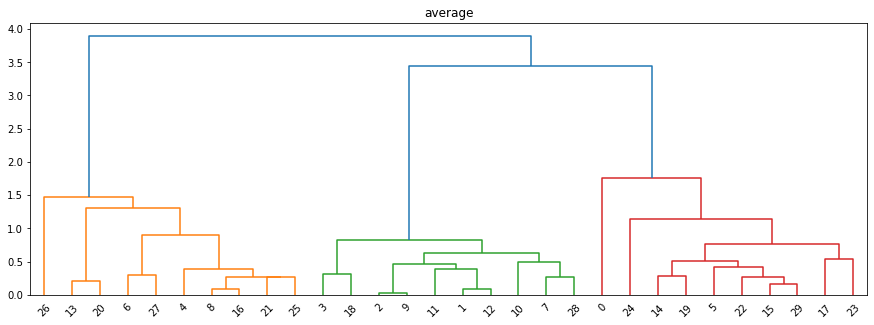

In [317]:
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(n_samples = 30, centers = 3, random_state = 0, cluster_std = 0.5)

plt.figure(figsize=(15,5))
Z = linkage(X, 'single')
dendrogram(Z)
plt.title('single')

plt.figure(figsize=(15,5))
Z = linkage(X, 'ward')
dendrogram(Z)
plt.title('ward')

plt.figure(figsize=(15,5))
Z = linkage(X, 'complete')
dendrogram(Z)
plt.title('complete')

plt.figure(figsize=(15,5))
Z = linkage(X, 'average')
dendrogram(Z)
plt.title('average')

plt.show()

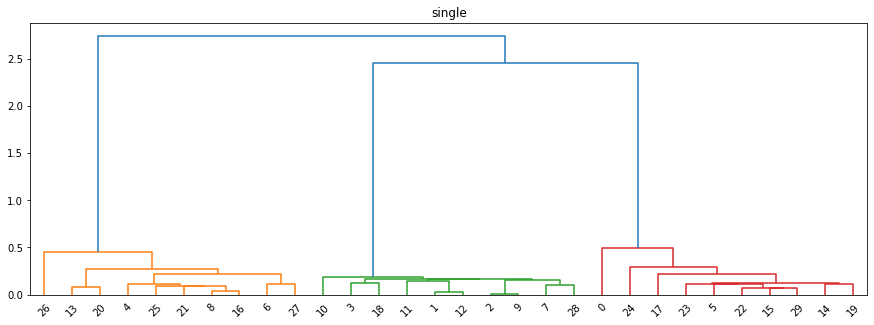

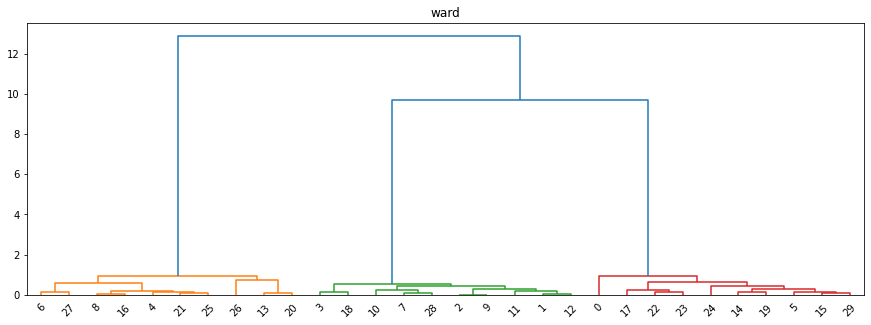

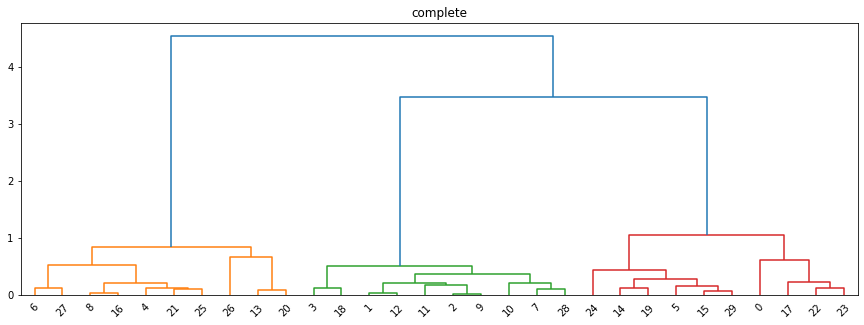

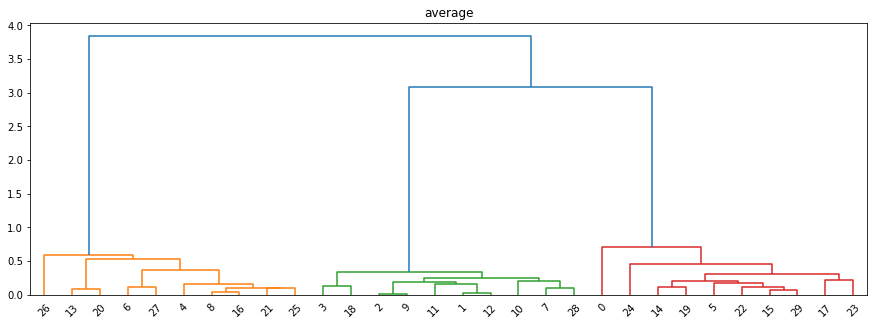

In [318]:
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(n_samples = 30, centers = 3, random_state = 0, cluster_std = 0.2)

plt.figure(figsize=(15,5))
Z = linkage(X, 'single')
dendrogram(Z)
plt.title('single')

plt.figure(figsize=(15,5))
Z = linkage(X, 'ward')
dendrogram(Z)
plt.title('ward')

plt.figure(figsize=(15,5))
Z = linkage(X, 'complete')
dendrogram(Z)
plt.title('complete')

plt.figure(figsize=(15,5))
Z = linkage(X, 'average')
dendrogram(Z)
plt.title('average')

plt.show()

In [321]:
from sklearn.cluster import DBSCAN

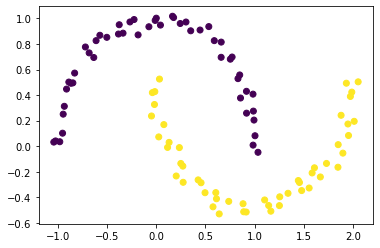

In [328]:
X, y = make_moons(noise = 0.05)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

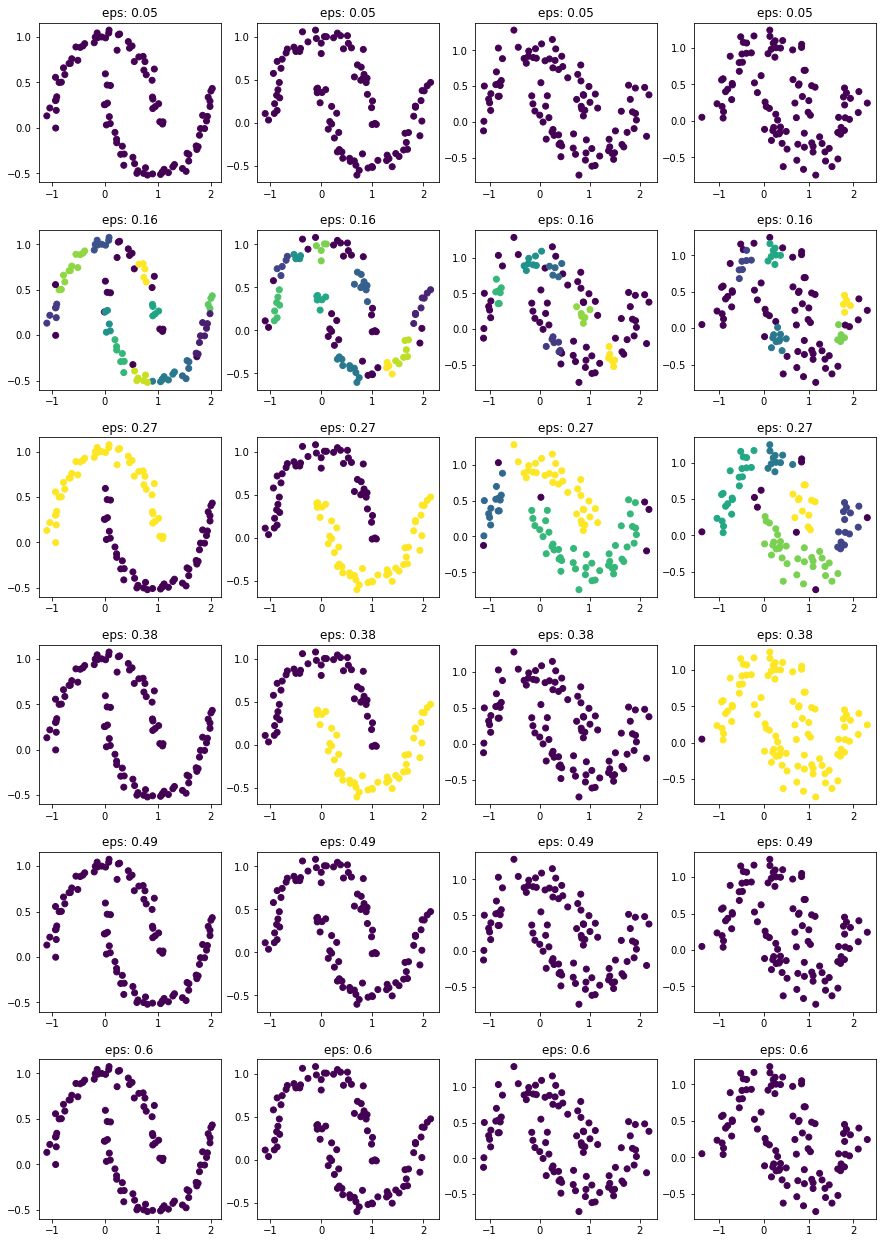

In [345]:
eps_list = np.linspace(0.05, 0.6, 6)
noise_list = np.linspace(0.05, 0.15, 4)
X_list = [ make_moons(noise = noise)[0] for noise in noise_list ]

fig, ax = plt.subplots(6, 4, figsize = (15,22), gridspec_kw = {'hspace': 0.3, 'wspace': 0.2})

for i, eps in enumerate(eps_list):
    for j, X in enumerate(X_list):        
        dbscan = DBSCAN(eps = eps, min_samples = 5)
        ax[i, j].scatter(X[:,0], X[:,1], c = dbscan.fit_predict(X))
        ax[i, j].set_title(f'eps: {round(eps,2)}')

plt.show()

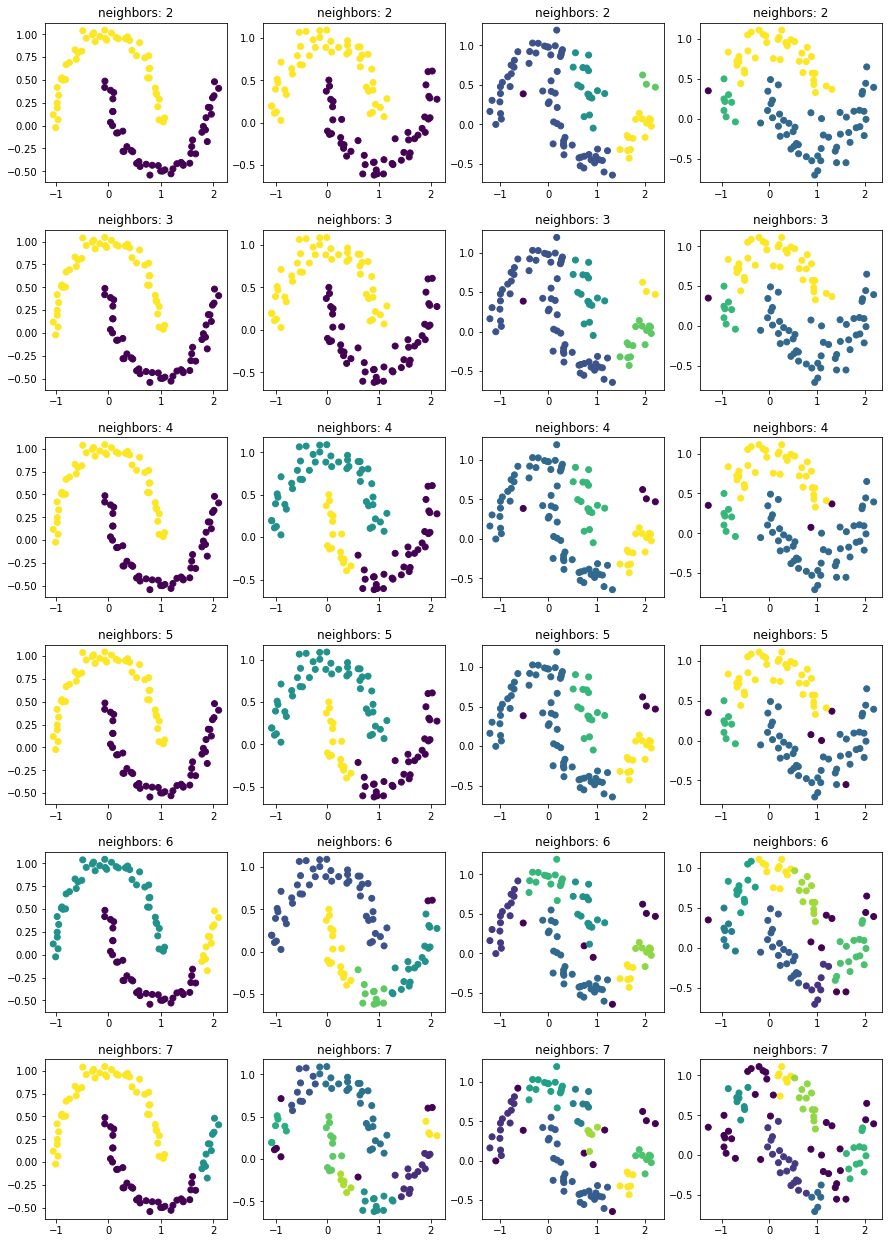

In [348]:
neighbors_list = np.arange(2,8,1)
noise_list = np.linspace(0.05, 0.15, 4)
X_list = [ make_moons(noise = noise)[0] for noise in noise_list ]

fig, ax = plt.subplots(6, 4, figsize = (15,22), gridspec_kw = {'hspace': 0.3, 'wspace': 0.2})

for i, n in enumerate(neighbors_list):
    for j, X in enumerate(X_list):        
        dbscan = DBSCAN(eps = 0.25, min_samples = n)
        ax[i, j].scatter(X[:,0], X[:,1], c = dbscan.fit_predict(X))
        ax[i, j].set_title(f'neighbors: {n}')

plt.show()

In [350]:
# -1 stands for noise
dbscan.fit_predict(X)

array([ 1,  0, -1,  0, -1,  1, -1,  0, -1, -1,  2,  0,  3, -1, -1, -1,  3,
        1,  3,  0, -1, -1,  0, -1, -1,  0,  4,  5,  4,  4,  1, -1, -1, -1,
        0,  3,  2, -1,  0,  3, -1, -1, -1,  0,  3, -1,  3,  0,  2,  3,  1,
       -1,  0,  2,  2,  2, -1, -1,  5,  5, -1, -1,  5,  3, -1,  5, -1,  2,
        0,  3,  0,  0,  2,  4,  4, -1, -1,  4,  4,  4,  0,  3,  4,  0,  4,
        5,  0, -1,  0,  0,  4,  4, -1, -1, -1,  1,  3,  5, -1,  2])

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


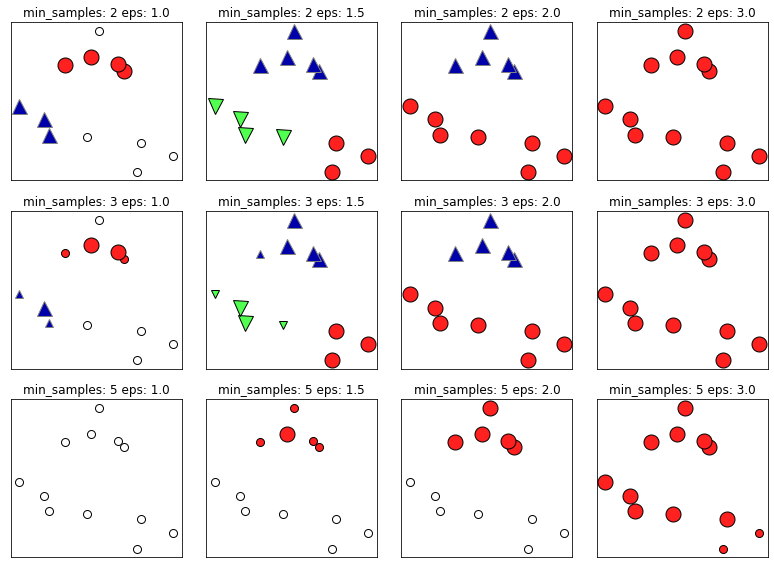

In [351]:
mglearn.plots.plot_dbscan()

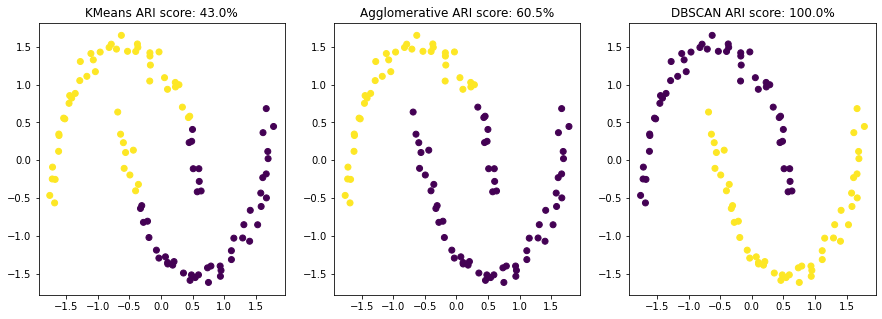

In [395]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(noise = 0.05)
X = StandardScaler().fit_transform(X)

# print(adjusted_rand_score(KMeans(n_clusters = 2).fit(X).predict(X), y))
# print(adjusted_rand_score(AgglomerativeClustering().fit_predict(X), y))
# print(adjusted_rand_score(DBSCAN(eps = 0.25, min_samples = 4).fit_predict(X), y))

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].scatter(X[:,0], X[:,1], c = KMeans(n_clusters = 2).fit_predict(X))
ax[0].set_title('KMeans ARI score: {:.1f}%'.format(100 * adjusted_rand_score(KMeans(n_clusters = 2).fit(X).predict(X), y)))
ax[1].scatter(X[:,0], X[:,1], c = AgglomerativeClustering().fit_predict(X))
ax[1].set_title('Agglomerative ARI score: {:.1f}%'.format(100 * adjusted_rand_score(AgglomerativeClustering().fit_predict(X), y)))
ax[2].scatter(X[:,0], X[:,1], c = DBSCAN(eps = 0.5, min_samples = 4).fit_predict(X))
ax[2].set_title('DBSCAN ARI score: {:.1f}%'.format(100 * adjusted_rand_score(DBSCAN(eps = 0.5, min_samples = 4).fit_predict(X), y)))

plt.show()

In [396]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


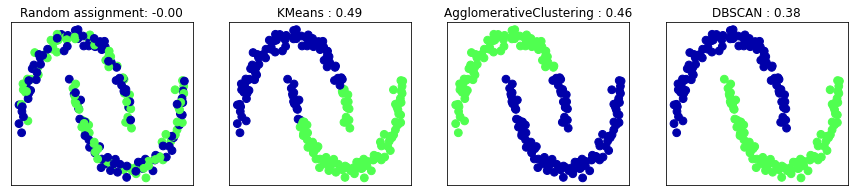

In [397]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

In [445]:
from sklearn.decomposition import PCA

from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20)

mask = np.zeros(people.target.shape, dtype = np.bool)

print(np.where(people.target == 0))
print(people.data[[0,2]])

for i in np.unique(people.target):
    mask[np.where(people.target == i)[0][:50]] = 1
    
print(mask)

X = people.data[mask]
y = people.target[mask]

print(y)

print(np.bincount(y))

X = X / 255.


(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998]),)
[[ 56.666668  71.333336 122.666664 ...  18.333334  17.        21.      ]
 [ 18.333334  15.666667  14.       ...  22.666666  22.666666  24.666666]]
[ True  True  True ... False False False]
[61 25  9 ...  9 37 22]
[39 35 21 36 20 50 42 24 29 21 50 31 50 22 50 50 44 26 30 22 39 50 20 28
 50 50 21 42 21 24 20 50 31 23 28 50 32 41 22 41 48 29 33 20 22 37 20 22
 30 27 32 26 23 50 33 23 25 33 50 32 49 24]


In [449]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [451]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X)
nmf = NMF(n_components = 100, random_state = 0, max_iter = 300).fit(X)

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [452]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)

In [453]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(labels, y))

0.0


In [454]:
dbscan = DBSCAN(eps = 30)
labels = dbscan.fit_predict(X)
print(adjusted_rand_score(labels, y))

0.0


In [455]:
dbscan = DBSCAN(eps = 100)
labels = dbscan.fit_predict(X)
print(adjusted_rand_score(labels, y))

0.0


In [456]:
dbscan = DBSCAN(eps = 20)
labels = dbscan.fit_predict(X)
print(adjusted_rand_score(labels, y))

0.0


In [479]:
dbscan = DBSCAN(eps = 10)
labels = dbscan.fit_predict(X)
print(adjusted_rand_score(labels, y))

4.2345272474501744e-05


In [480]:
dbscan = DBSCAN(eps = 10, min_samples = 3)
labels = dbscan.fit_predict(X)
print(adjusted_rand_score(labels, y))

4.2345272474501744e-05


In [481]:
print(np.unique(labels))
print(np.unique(-labels))
print(np.bincount(-labels))

[-1  0]
[0 1]
[2035   28]


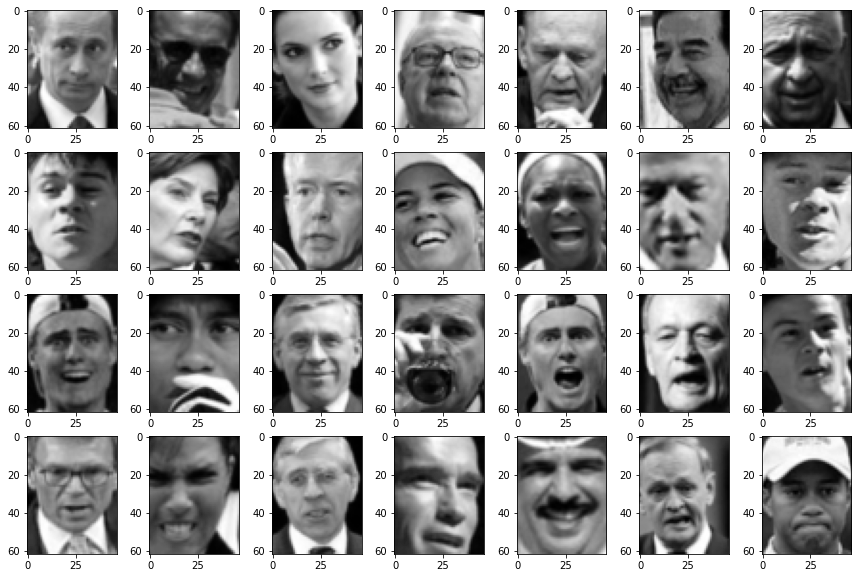

In [472]:
fig, axes = plt.subplots(4, 7, figsize = (15,10))

noise = X[labels == -1]
# noise = X[labels[np.where(labels == -1)[0]]]

for ax, img in zip(axes.ravel(), noise):
    ax.imshow(img.reshape(62,47), cmap = 'gray')

In [482]:
eps_list = np.linspace(1,15,5)
min_samples_list = np.arange(3,4,1)

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(X)
        print('eps = {}, min_samples = {}: labels = {}'.format(round(eps,2), min_samples, np.unique(labels)))
        print('bins = {}'.format(np.bincount(labels + 1)))

eps = 1.0, min_samples = 3: labels = [-1]
bins = [2063]
eps = 4.5, min_samples = 3: labels = [-1  0  1]
bins = [2057    3    3]
eps = 8.0, min_samples = 3: labels = [-1  0]
bins = [ 320 1743]
eps = 11.5, min_samples = 3: labels = [-1  0]
bins = [   1 2062]
eps = 15.0, min_samples = 3: labels = [0]
bins = [   0 2063]


In [487]:
eps_list = np.linspace(4, 9, 5)
min_samples_list = np.arange(3,4,1)

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples, algorithm = 'ball_tree') # ball_tree for speed
        labels = dbscan.fit_predict(X)
        print('eps = {}, min_samples = {}: labels = {}'.format(round(eps,2), min_samples, np.unique(labels)))
        print('bins = {}'.format(np.bincount(labels + 1)))

eps = 4.0, min_samples = 3: labels = [-1]
bins = [2063]
eps = 5.25, min_samples = 3: labels = [-1  0  1  2  3  4  5  6  7  8  9]
bins = [1958   63    4    9    7    6    4    3    3    3    3]
eps = 6.5, min_samples = 3: labels = [-1  0  1  2  3]
bins = [1242  811    4    3    3]
eps = 7.75, min_samples = 3: labels = [-1  0  1]
bins = [ 415 1645    3]
eps = 9.0, min_samples = 3: labels = [-1  0]
bins = [ 110 1953]


In [488]:
eps_list = np.linspace(5,7,3)
min_samples_list = np.arange(3,4,1)

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples, algorithm = 'ball_tree') # ball_tree for speed
        labels = dbscan.fit_predict(X)
        print('eps = {}, min_samples = {}: labels = {}'.format(round(eps,2), min_samples, np.unique(labels)))
        print('bins = {}'.format(np.bincount(labels + 1)))

eps = 5.0, min_samples = 3: labels = [-1  0  1  2  3  4  5  6  7  8]
bins = [2019    4    3    3    3   13    3    6    5    4]
eps = 6.0, min_samples = 3: labels = [-1  0  1  2  3  4  5  6  7  8]
bins = [1573  463    3    4    4    4    3    3    3    3]
eps = 7.0, min_samples = 3: labels = [-1  0  1  2]
bins = [ 847 1210    3    3]


In [490]:
dbscan = DBSCAN(eps = 6, min_samples = 3, algorithm = 'ball_tree') # ball_tree for speed
labels = dbscan.fit_predict(X)
print(np.unique(labels))
print(np.bincount(labels + 1))

[-1  0  1  2  3  4  5  6  7  8]
[1573  463    3    4    4    4    3    3    3    3]


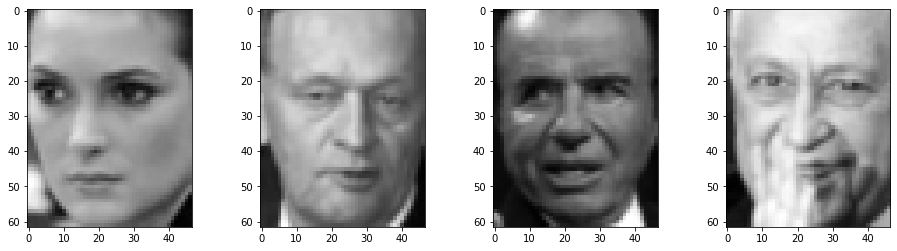

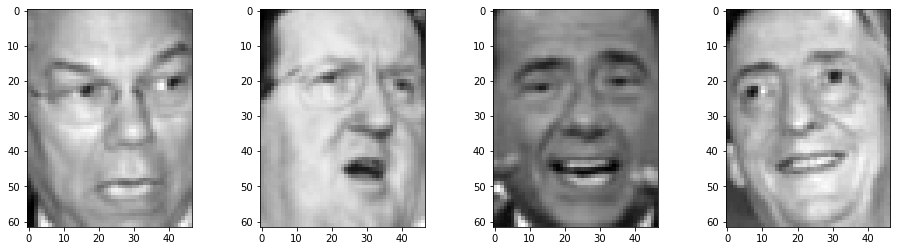

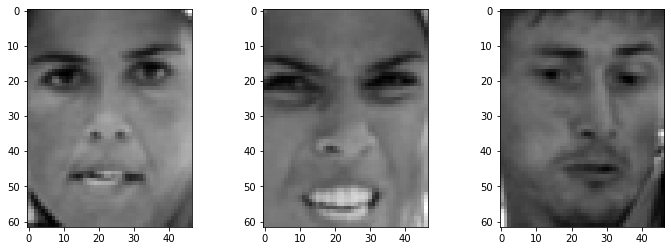

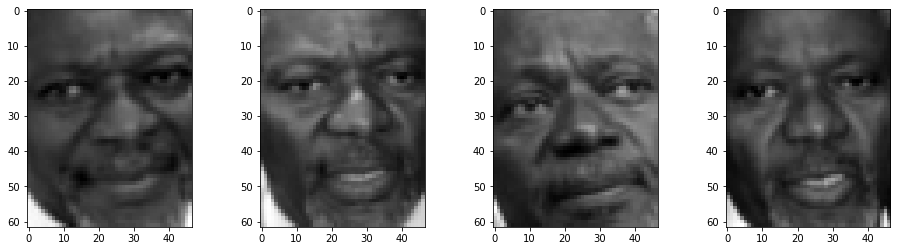

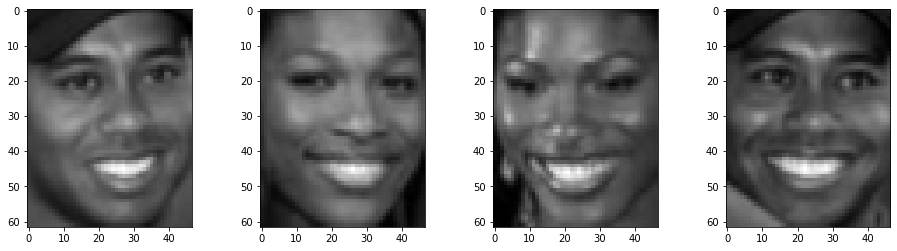

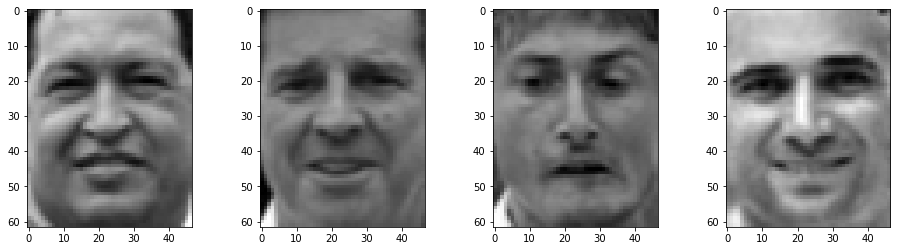

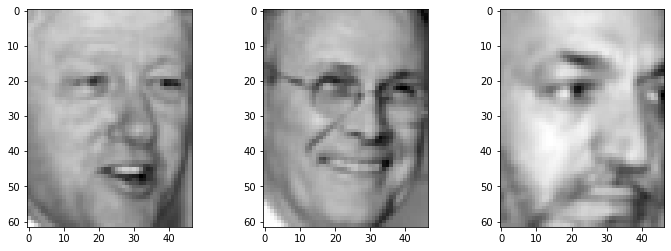

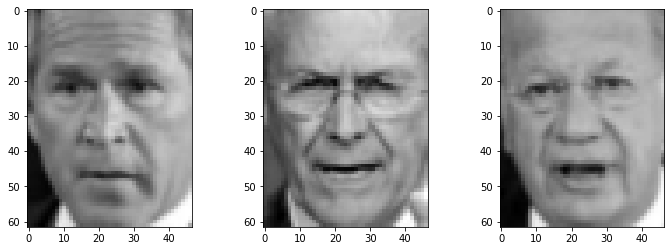

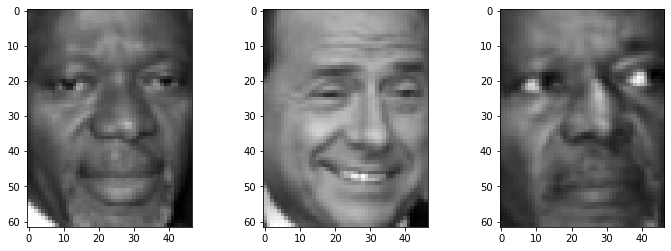

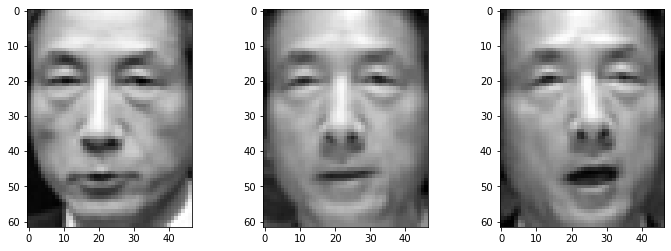

In [494]:
for label in np.unique(labels):
    faces = X[labels == label][:4]
    fig, axes = plt.subplots(1,len(faces), figsize=(4 * len(faces),4))
    for ax, face in zip(axes.ravel(), faces):
        ax.imshow(face.reshape(62, 47), cmap = 'gray')

In [500]:
km = KMeans(n_clusters = 10, random_state = 0, algorithm = 'auto')
labels_km = km.fit_predict(X)
print('Cluster sizes:\t', np.bincount(labels_km))

Cluster sizes:	 [162 248 215 320 177 218 202 204 130 187]


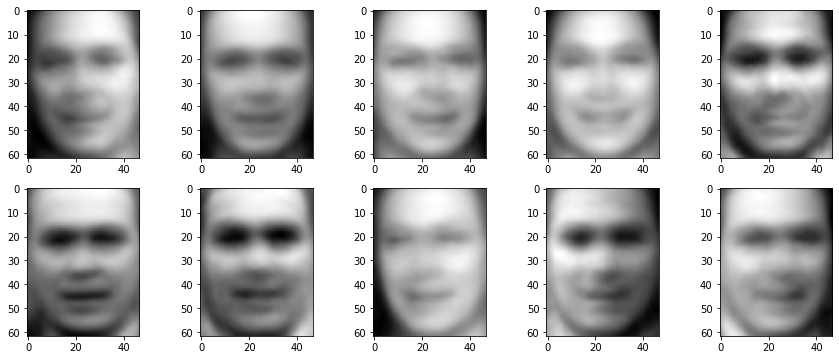

In [503]:
fig, axes = plt.subplots(2, 5, figsize= (15, 6))

for i in range(2):
    for j in range(5):
        ind = 5 * i + j
        center = km.cluster_centers_[ind]
        axes[i, j].imshow(center.reshape(62,47), cmap = 'gray')

In [509]:
agg = AgglomerativeClustering(n_clusters = 10)
labels_agg = agg.fit_predict(X)
print('Cluster sizes:\t', np.bincount(labels_agg))

Cluster sizes:	 [289 257 208 367 276 126  96 187 142 115]


In [510]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.24


In [511]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, y)))

ARI: 0.02


In [512]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_km, y)))

ARI: 0.02


In [513]:
linkage_array = linkage(X, 'ward')

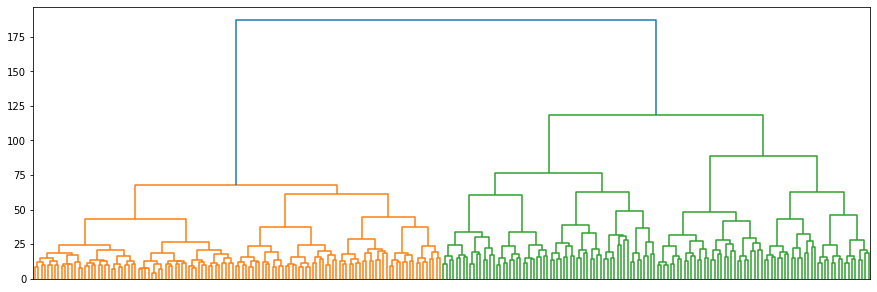

In [520]:
X_pca = PCA(n_components = 100).fit(X).transform(X)

linkage_array = linkage(X_pca, 'ward')

fig, ax = plt.subplots(1,1,figsize=(15,5))
dendrogram(linkage_array, p = 7, truncate_mode = 'level', no_labels = True)
plt.show()

cluster sizes agglomerative clustering: [61 63 68 93 77 60 71 89 41 38 41 77 27 36 51 77 80 45 44 33 55 70 70 54
 20 26 52 50 68 29 19 34 37 63 31 81 15 26 54 37]


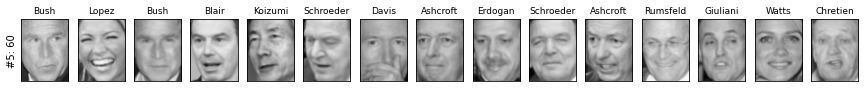

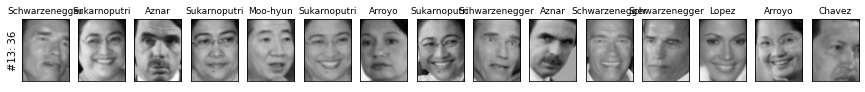

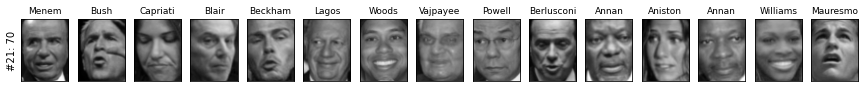

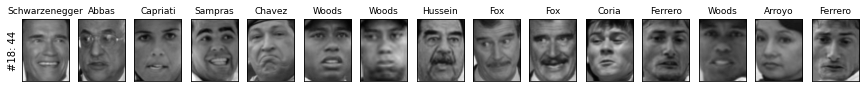

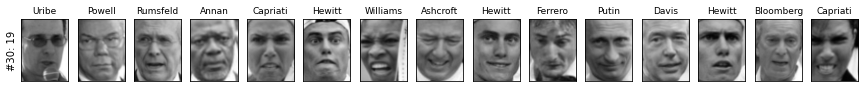

In [527]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [5, 13, 21, 18, 30]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(62, 47), vmin=0, vmax=1, cmap = 'gray')
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)